<a href="https://colab.research.google.com/github/makaronaaa/DataSciencePython/blob/main/TrendChangeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv
import sys, traceback, math
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from matplotlib.pyplot import figure
from scipy.stats import norm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [4]:
def find_month(row):
    return row["Date"].month

def linear_regression(df, plot = False, sub = None):
   
    X = df["index"].values.reshape(-1, 1)
    y = df["Adj Close"].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    pred_ = reg.coef_ * X + reg.intercept_
    residual = y - pred_
    sse_t = (residual.T @ residual)[0][0]
    
    if plot:
        figure(figsize = (25, 10))
        plt.plot(X, pred_, color = "Red", label = "Regression Line")
        plt.scatter(X, y, color = "Blue", label = "Price action")
        plt.xlabel("Days of month")
        plt.ylabel("Price")
        x_ticks = np.arange(1, len(df), 1)
        plt.xticks(x_ticks)
        year, month = df["Year"].iloc[-1], df["Month"].iloc[-1]
        if sub is not None:
            plt.suptitle(f"Year:{year}, Month:{month}, [{sub}] Regression.")
        else:
            plt.suptitle(f"Year:{year}, Month:{month} Regression.")
        plt.legend()
        plt.show()
    
    return round(sse_t, 2)

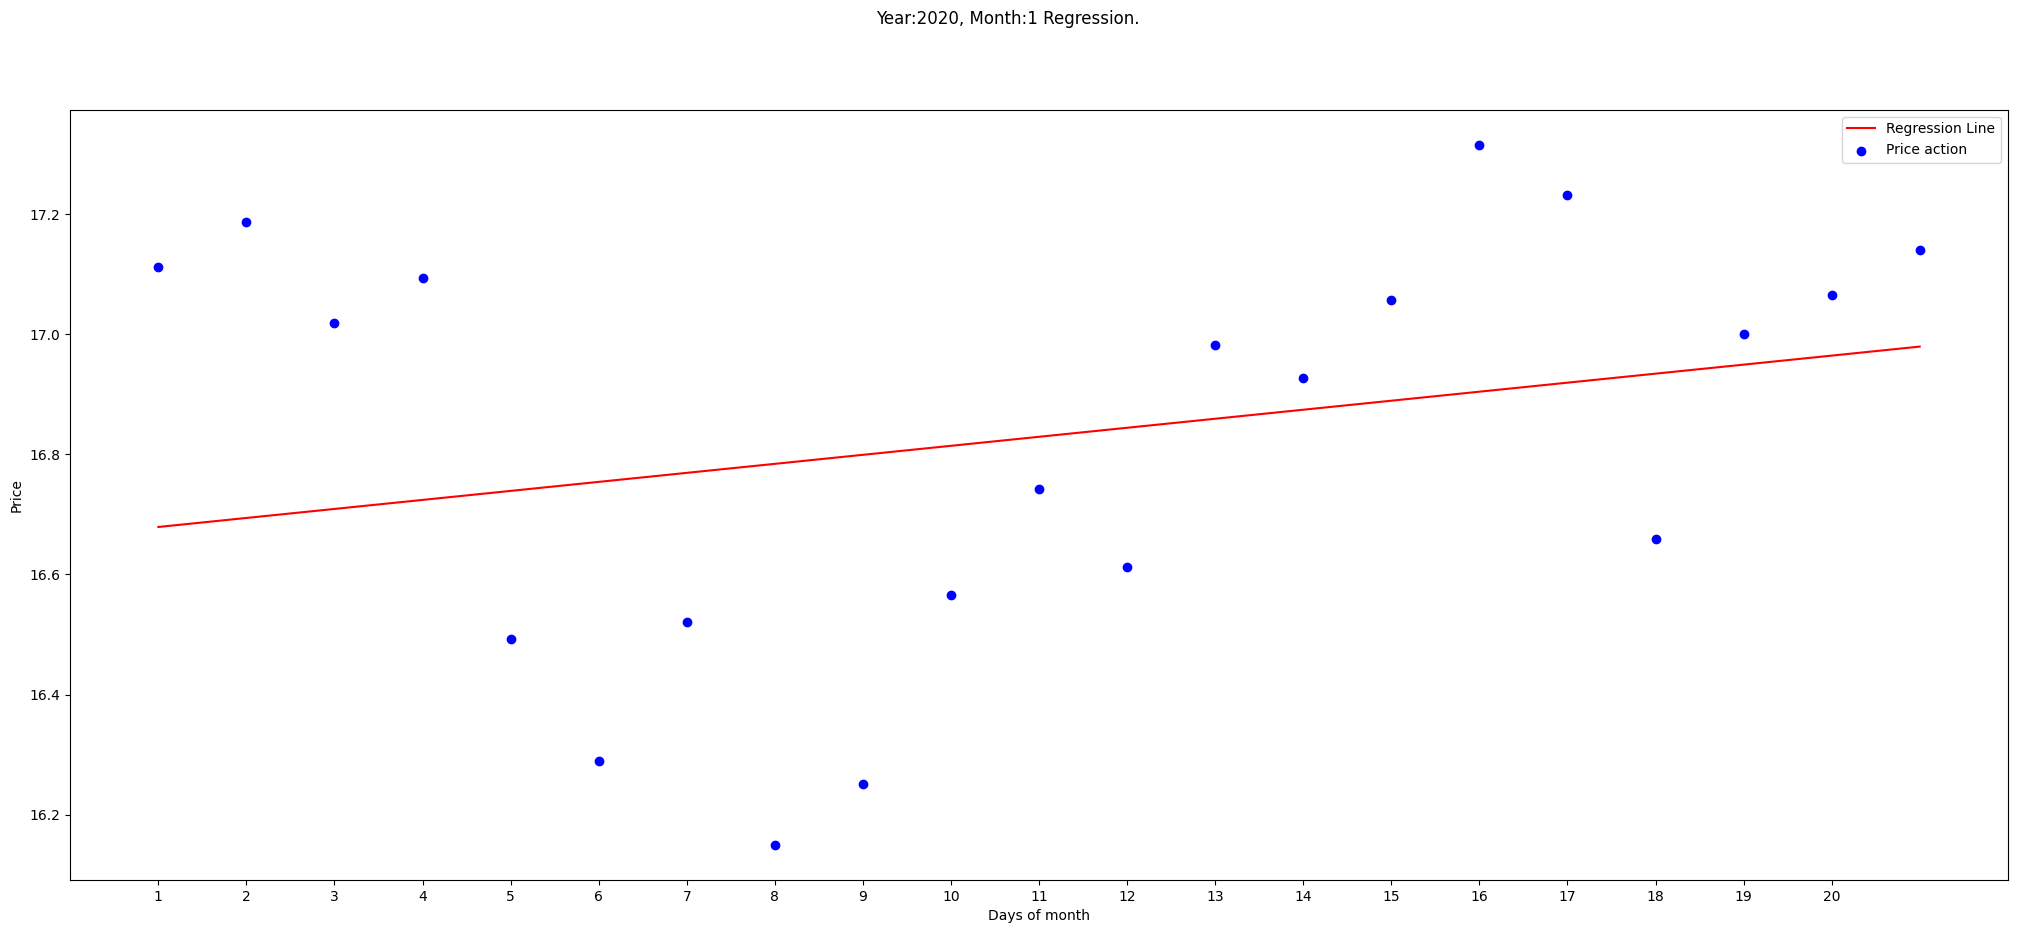

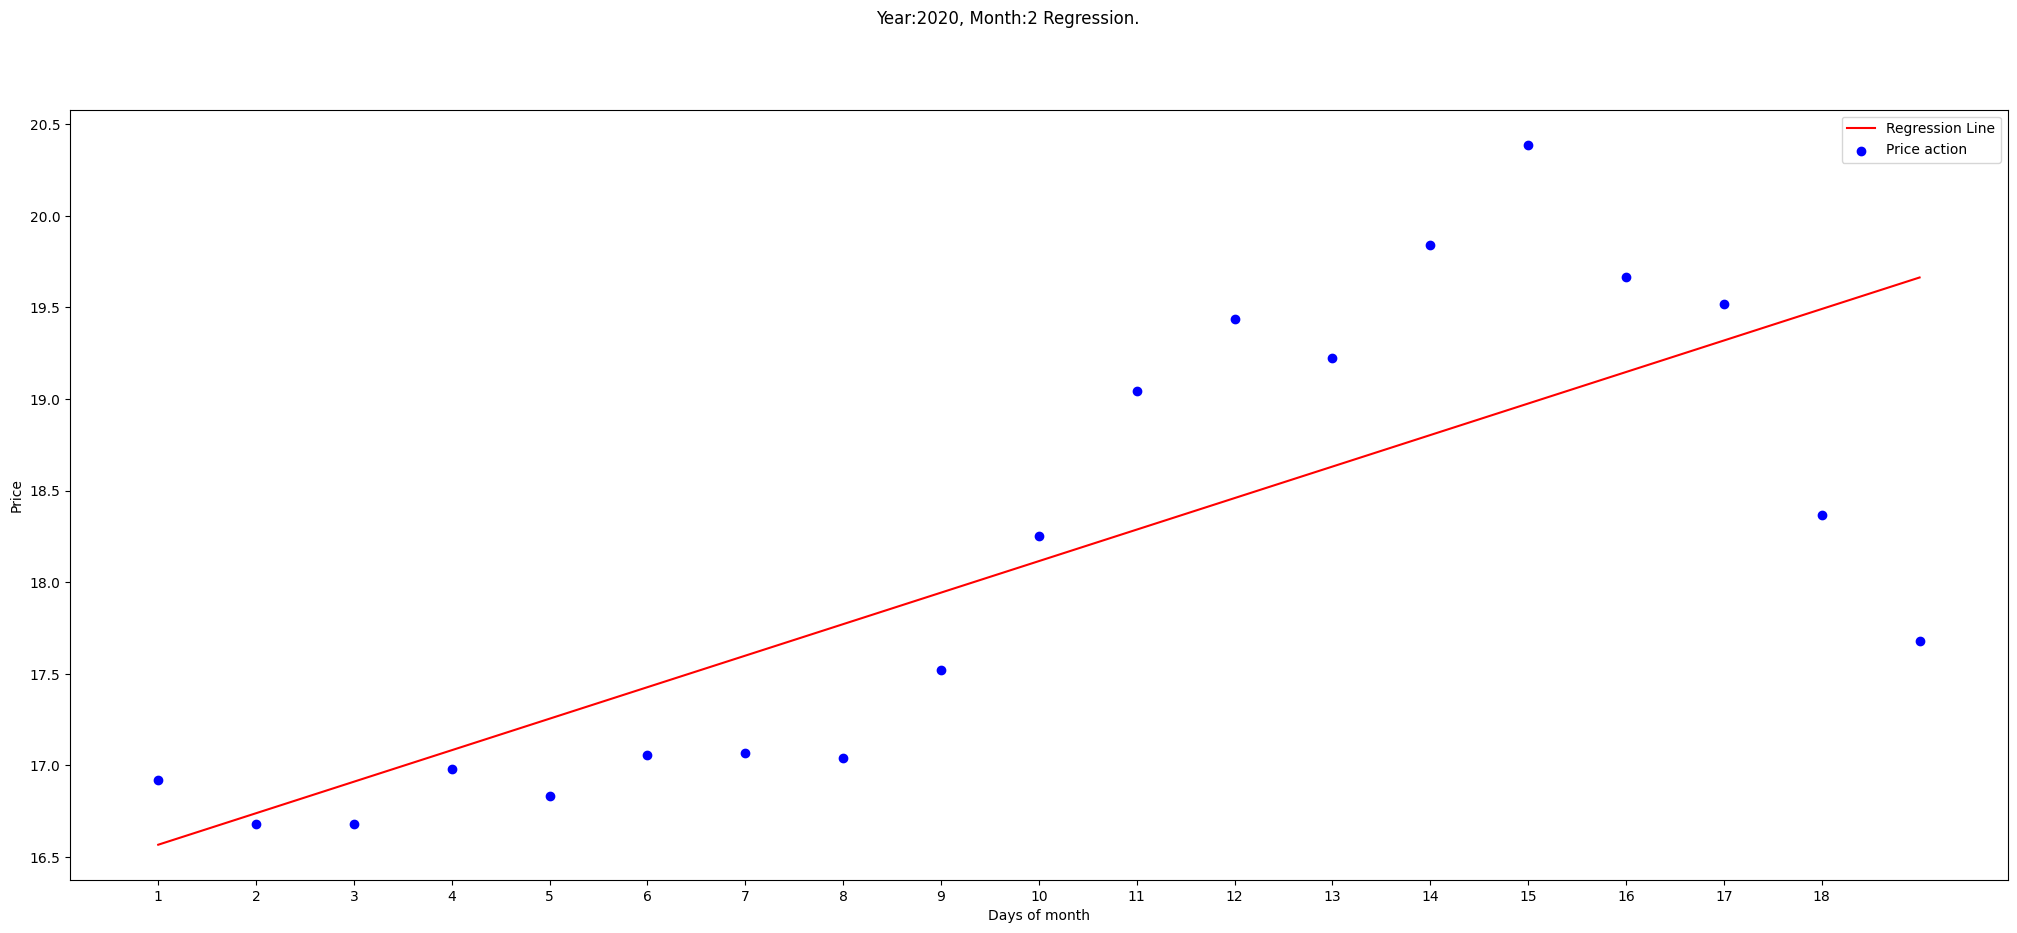

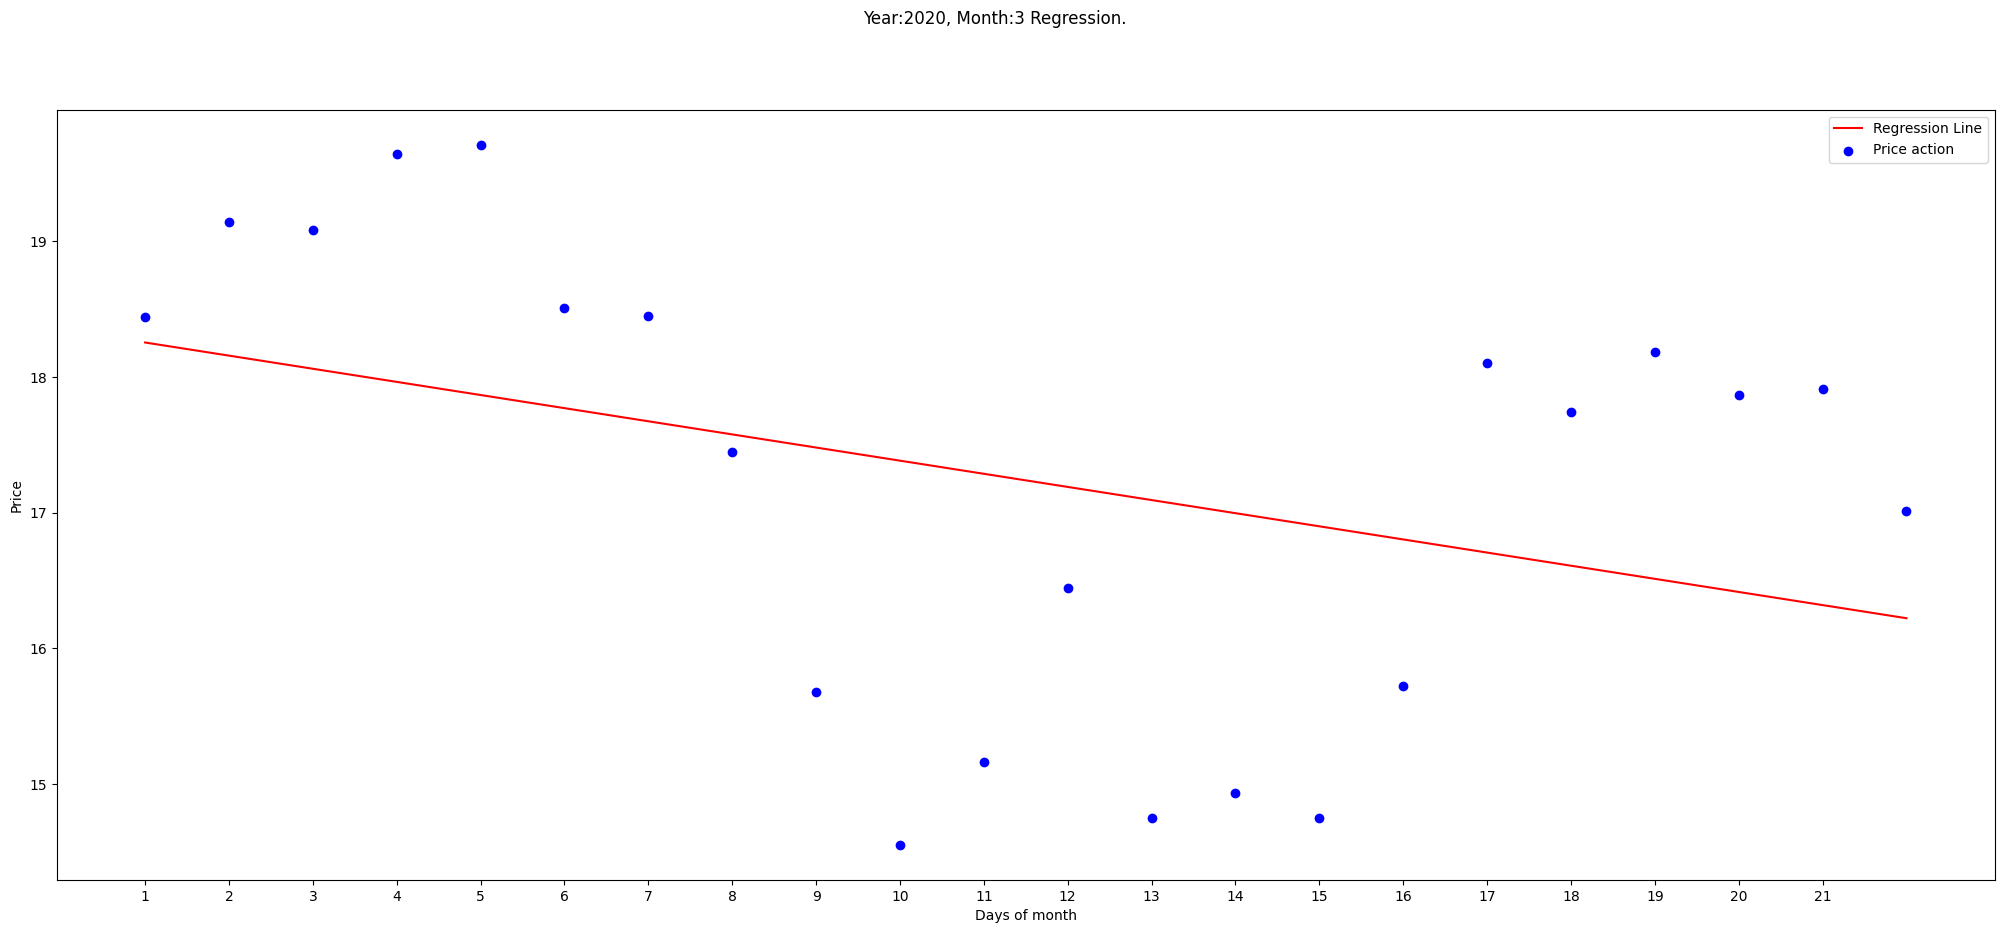

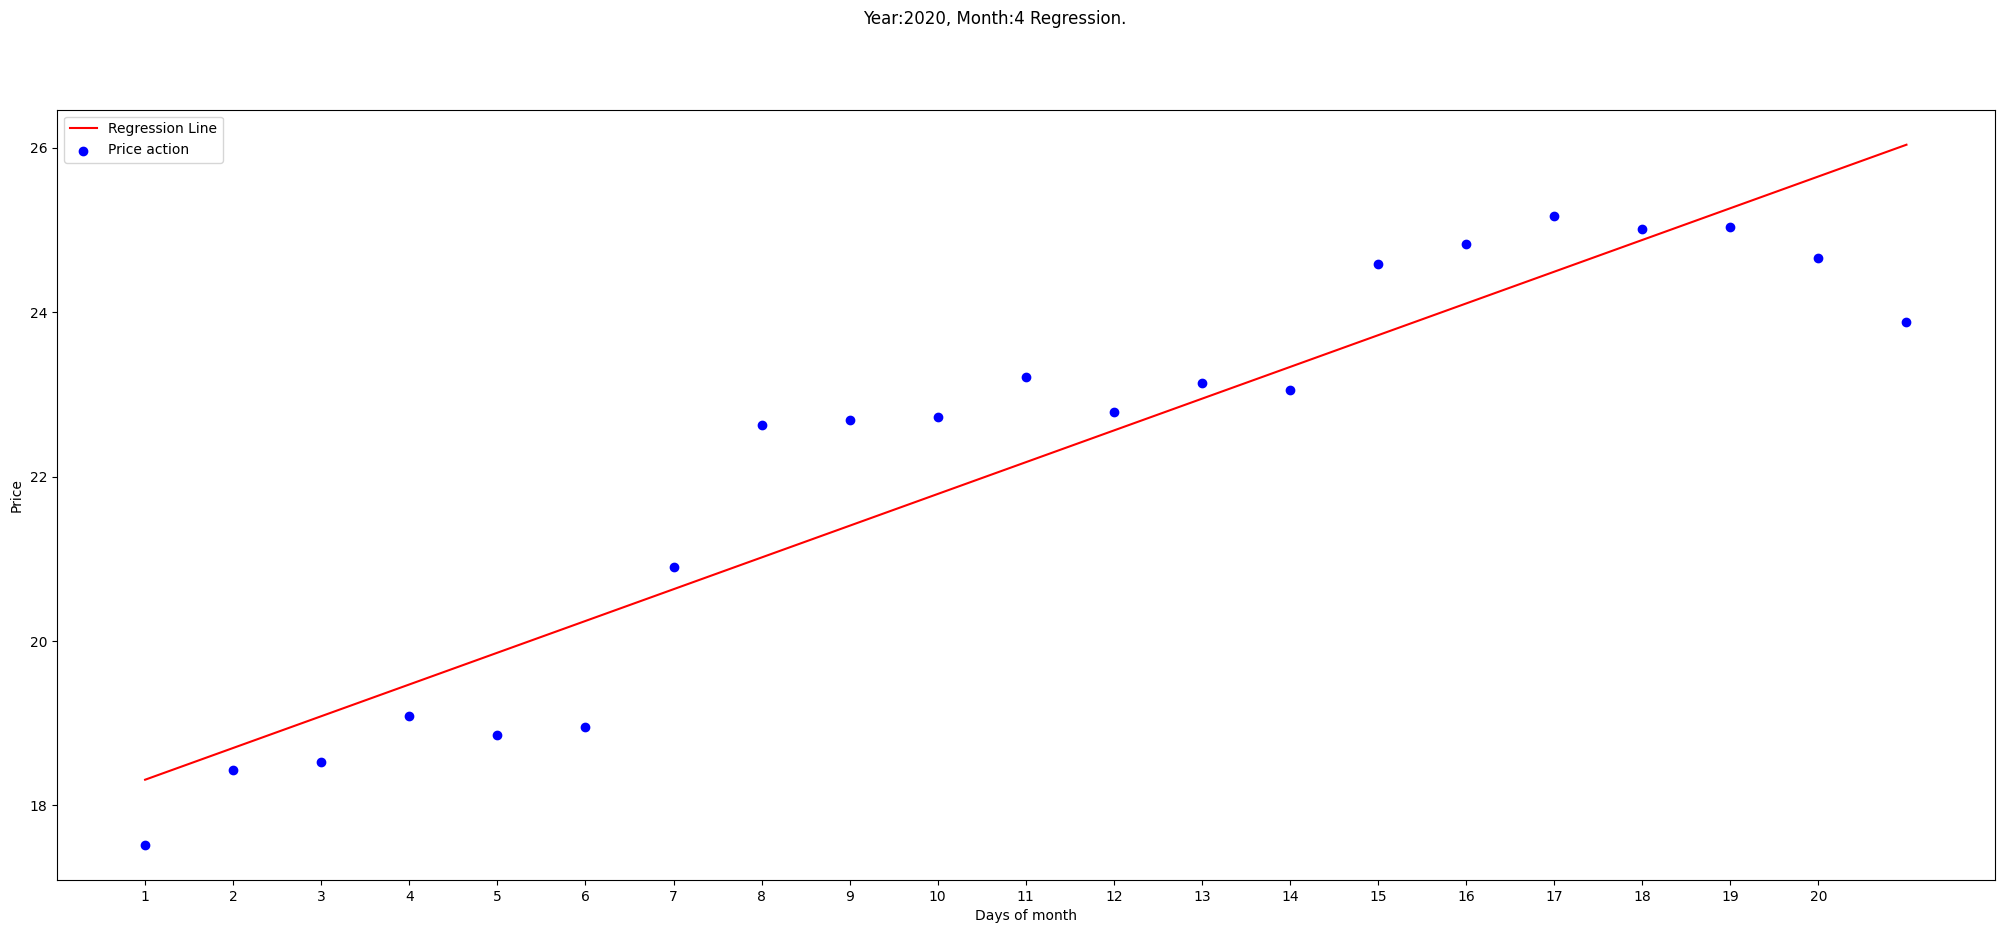

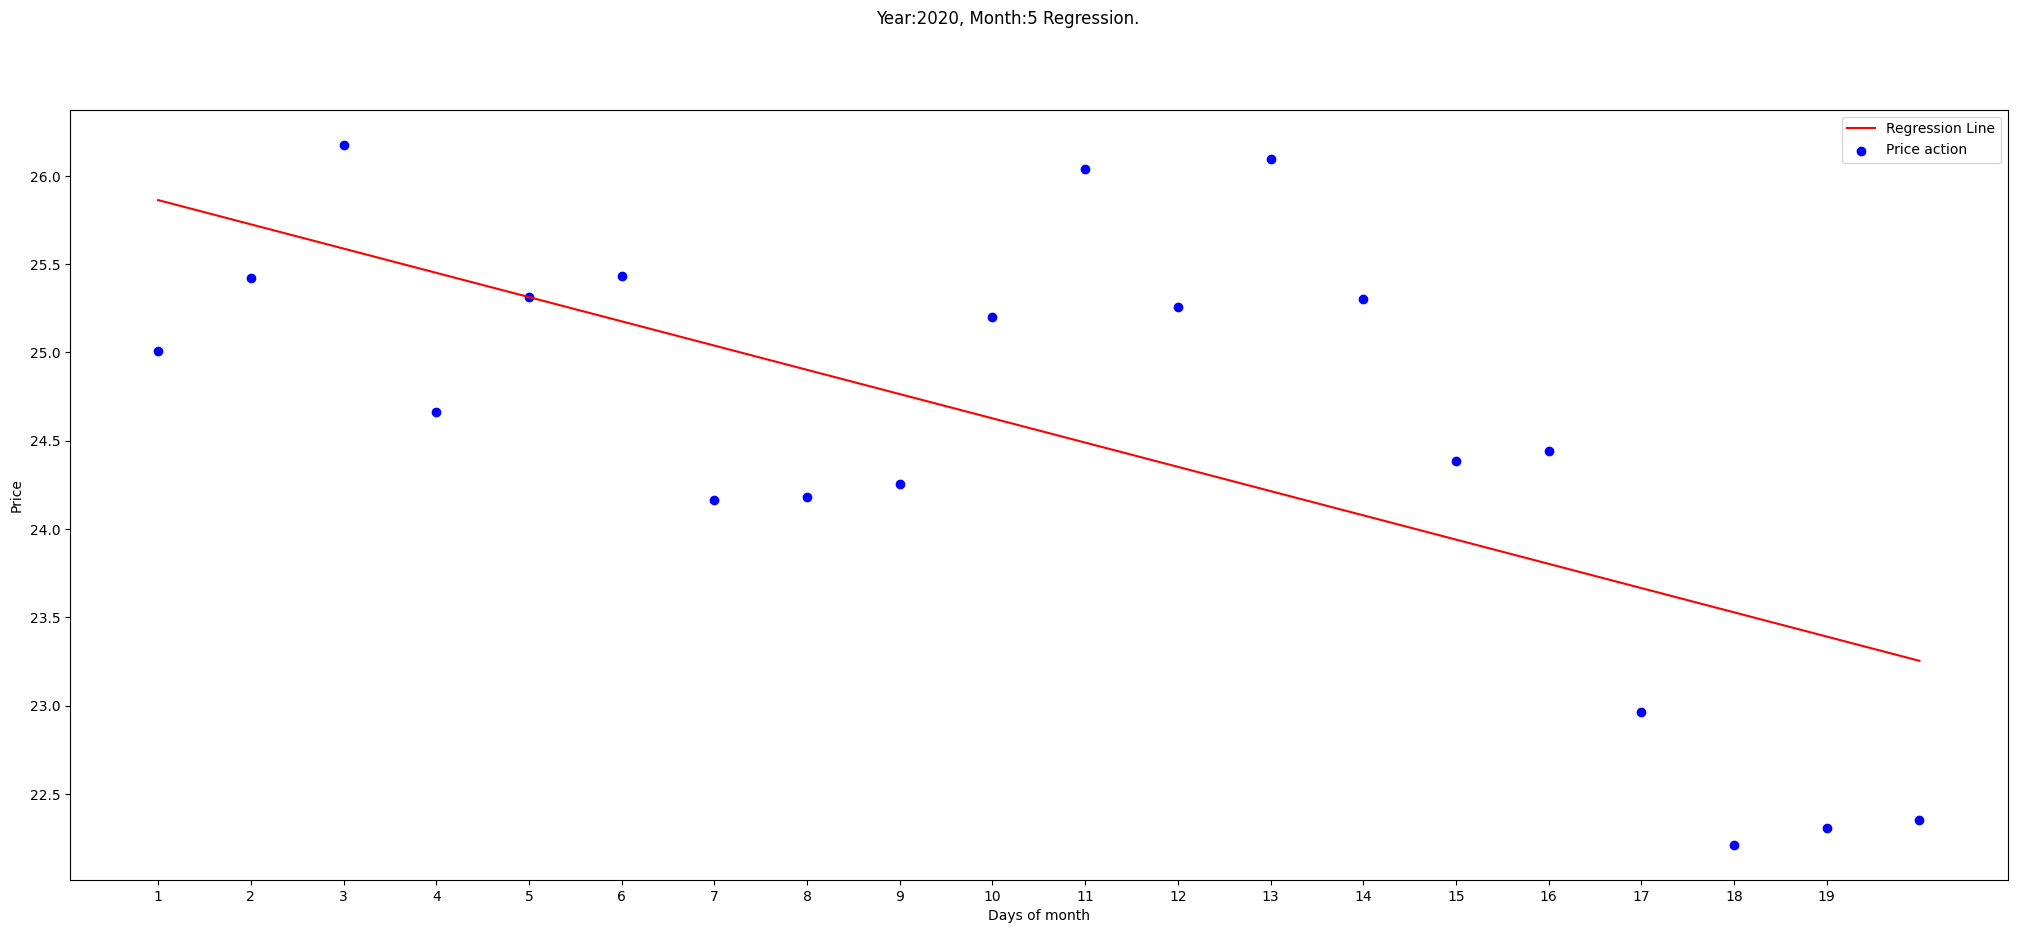

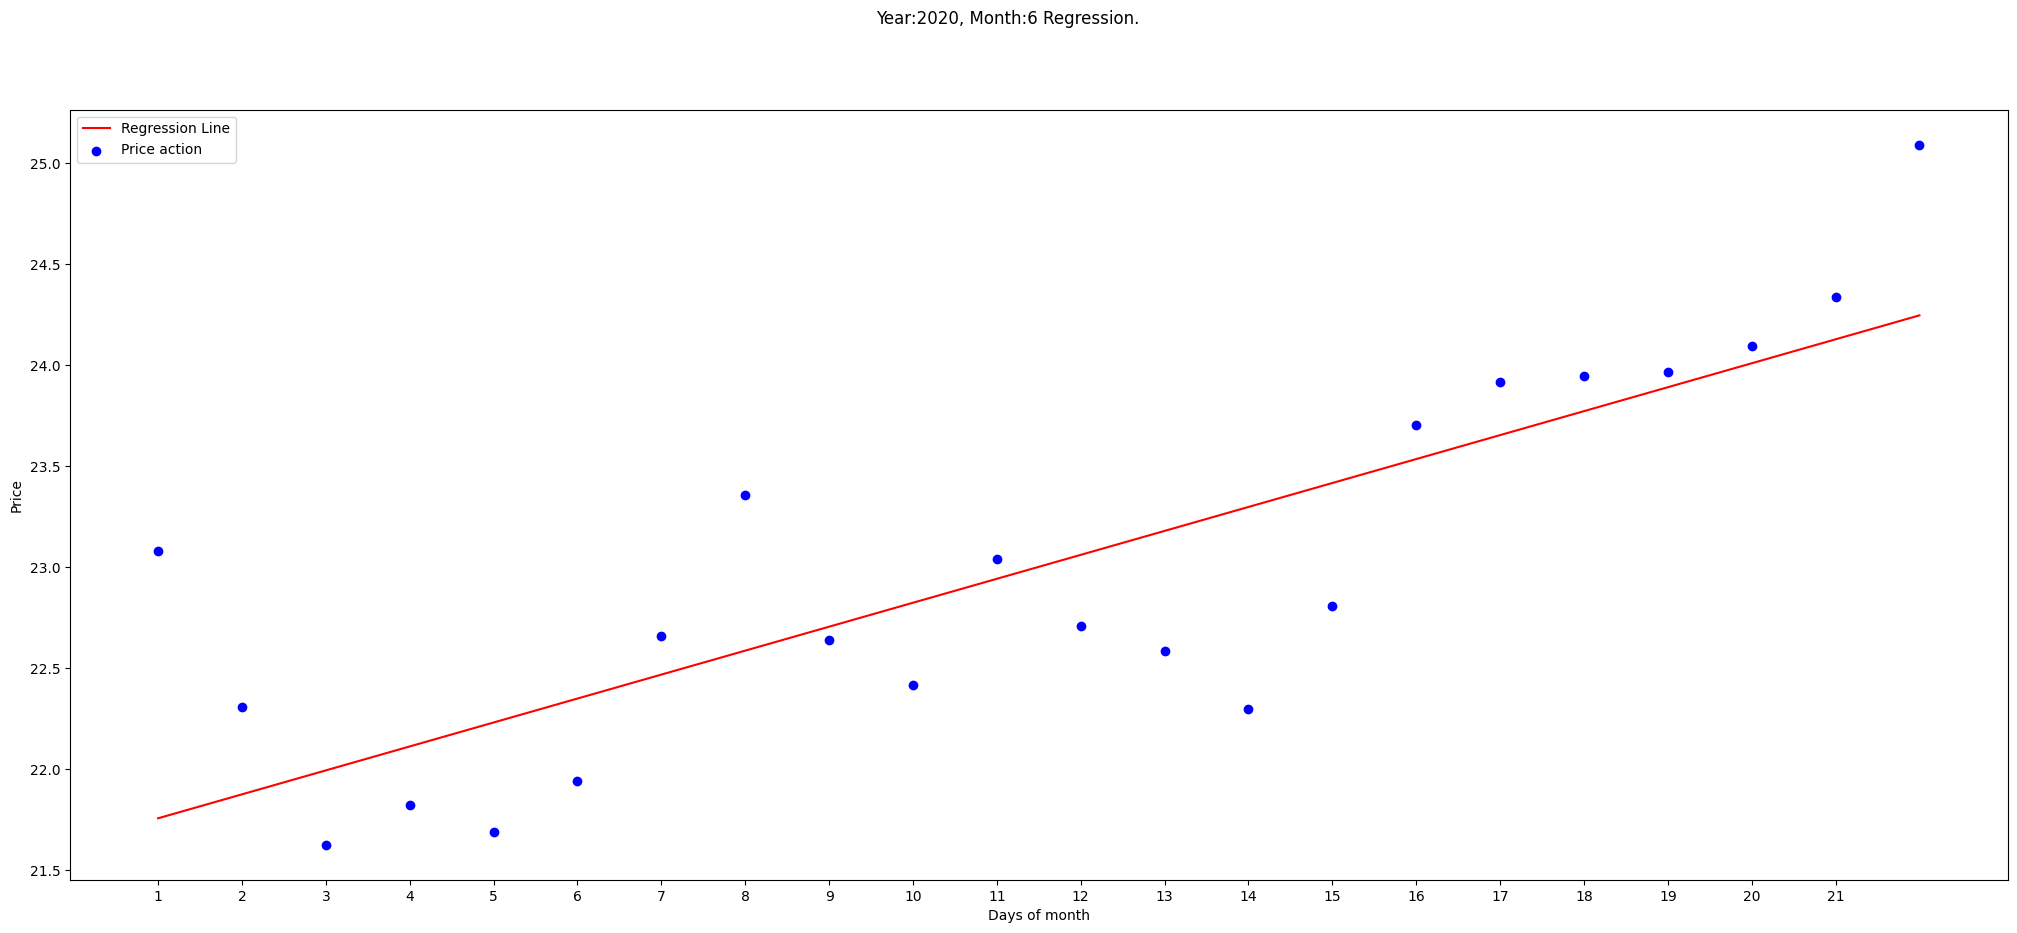

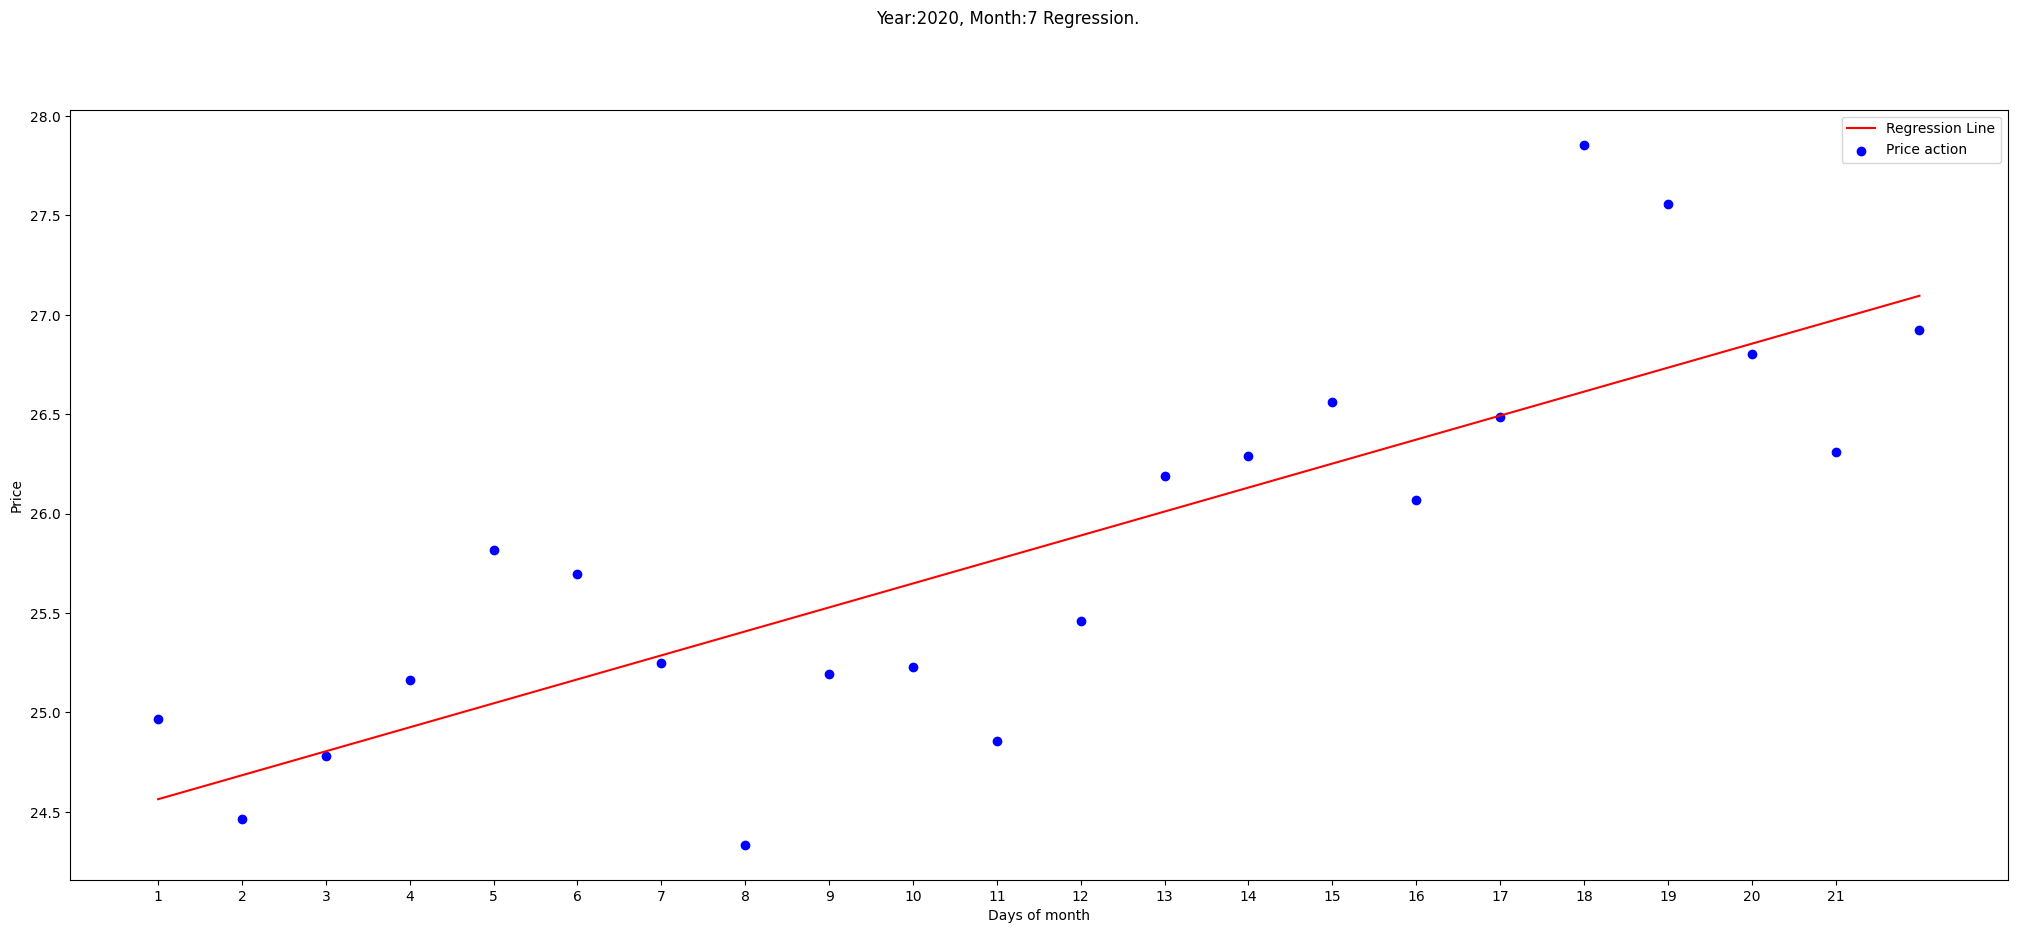

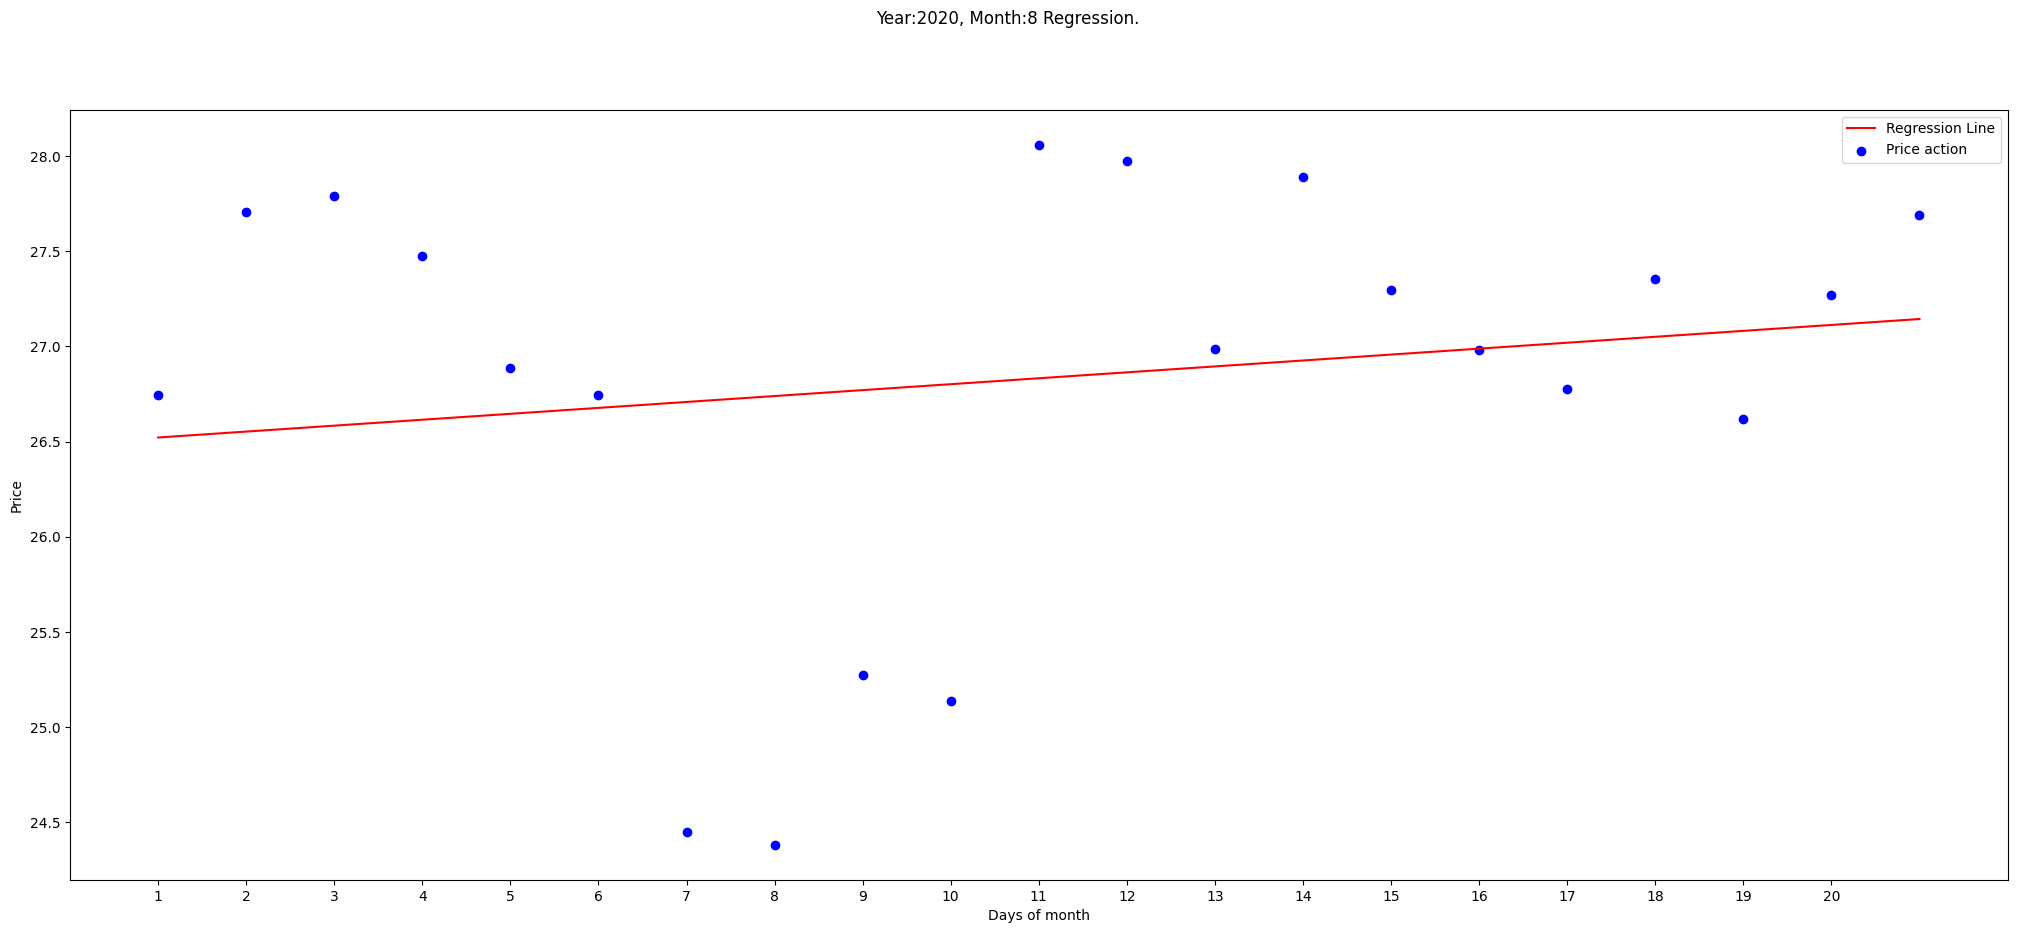

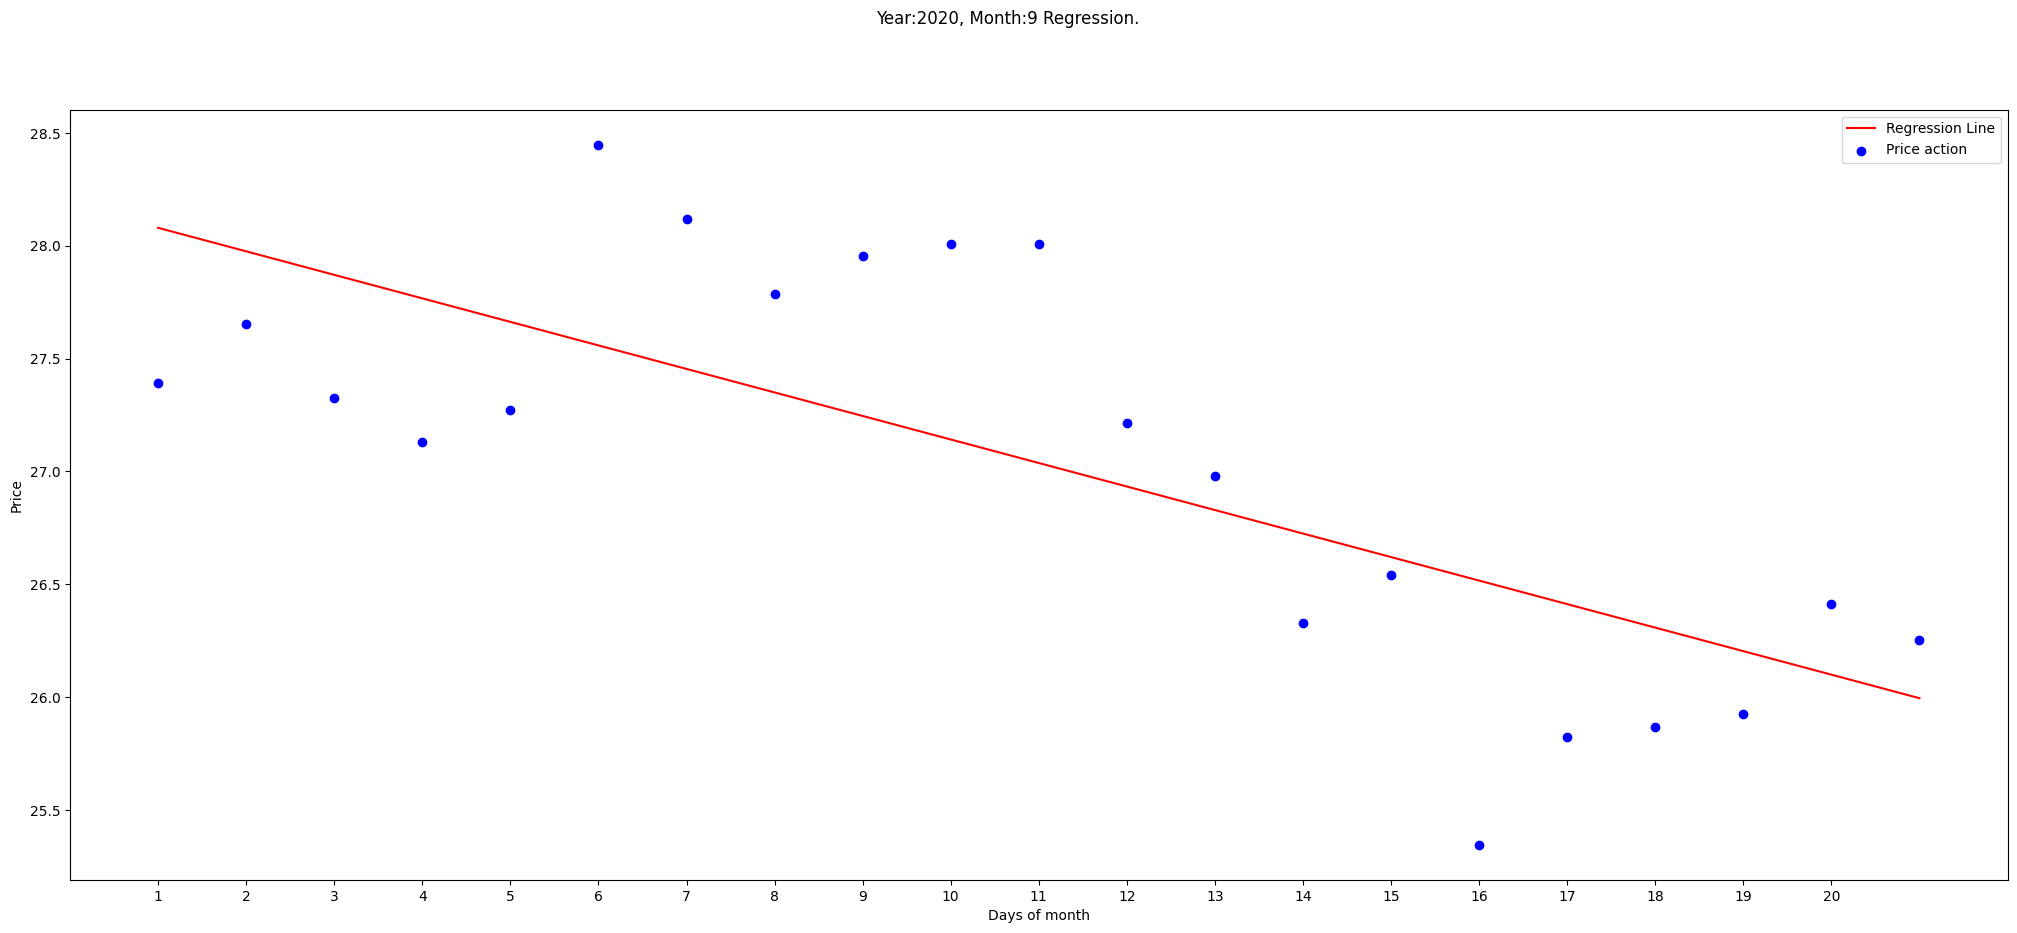

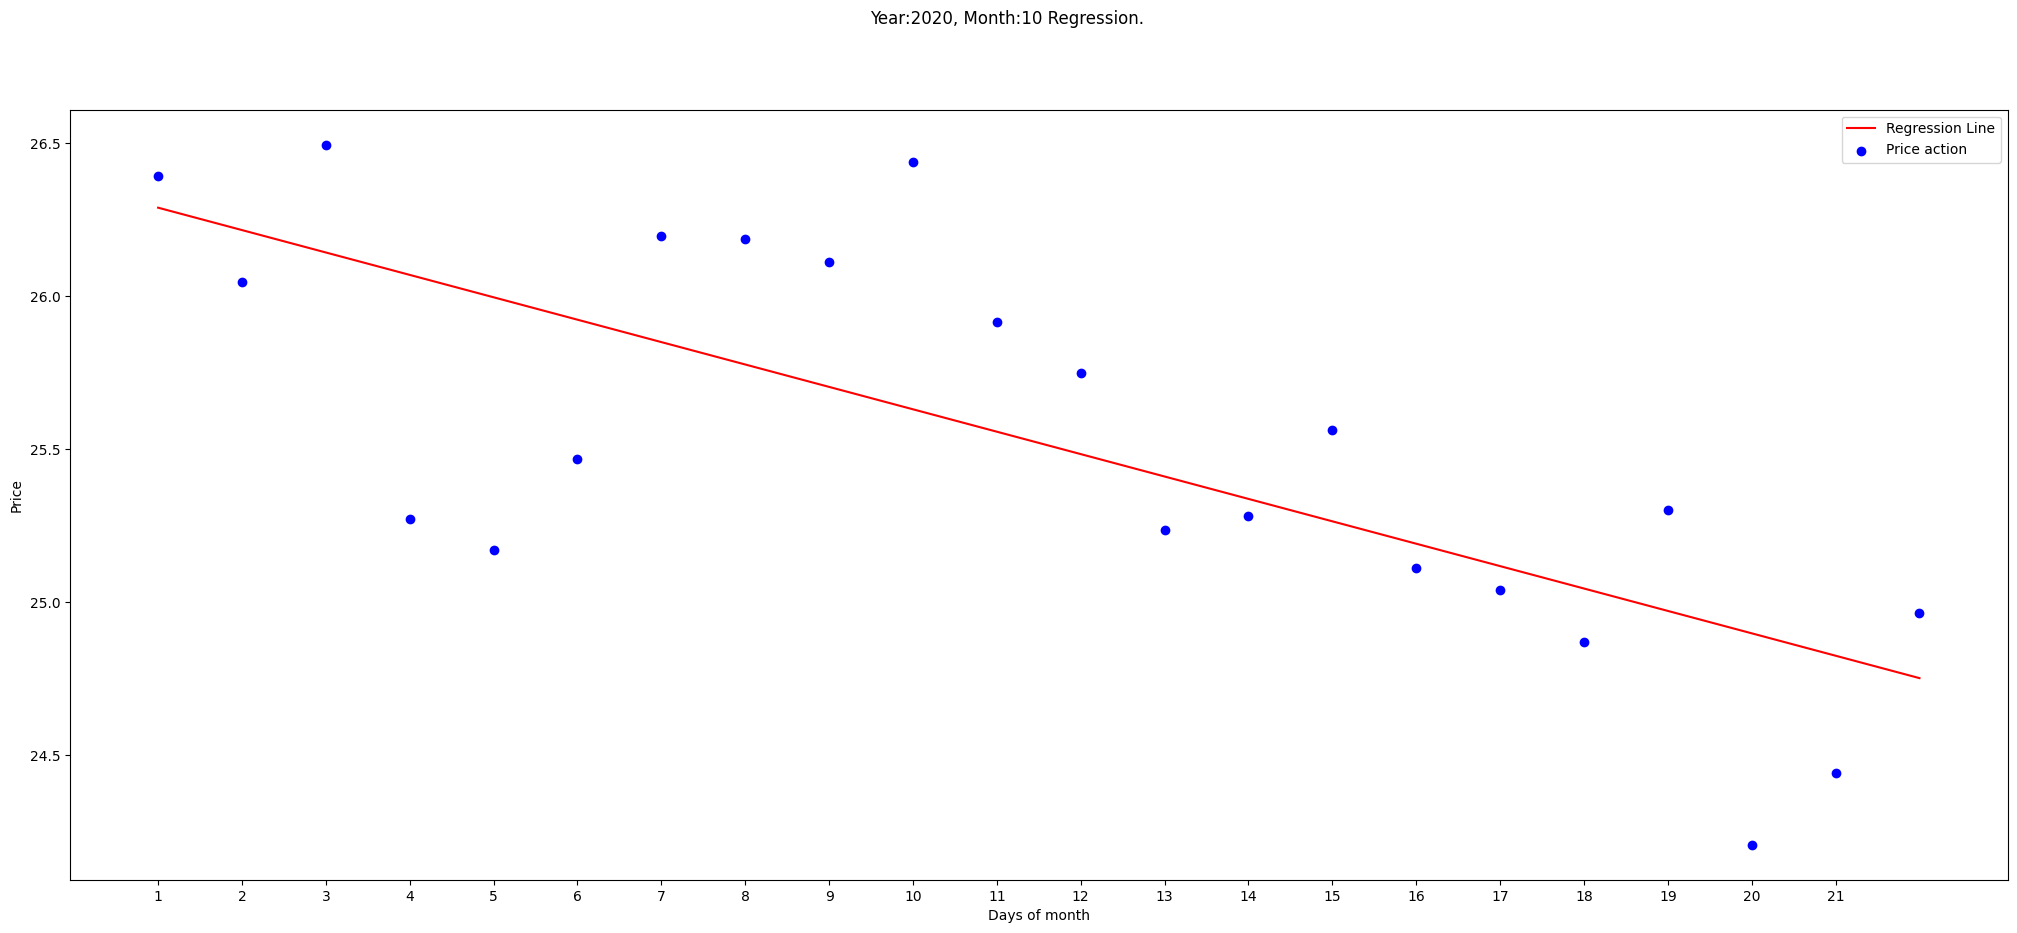

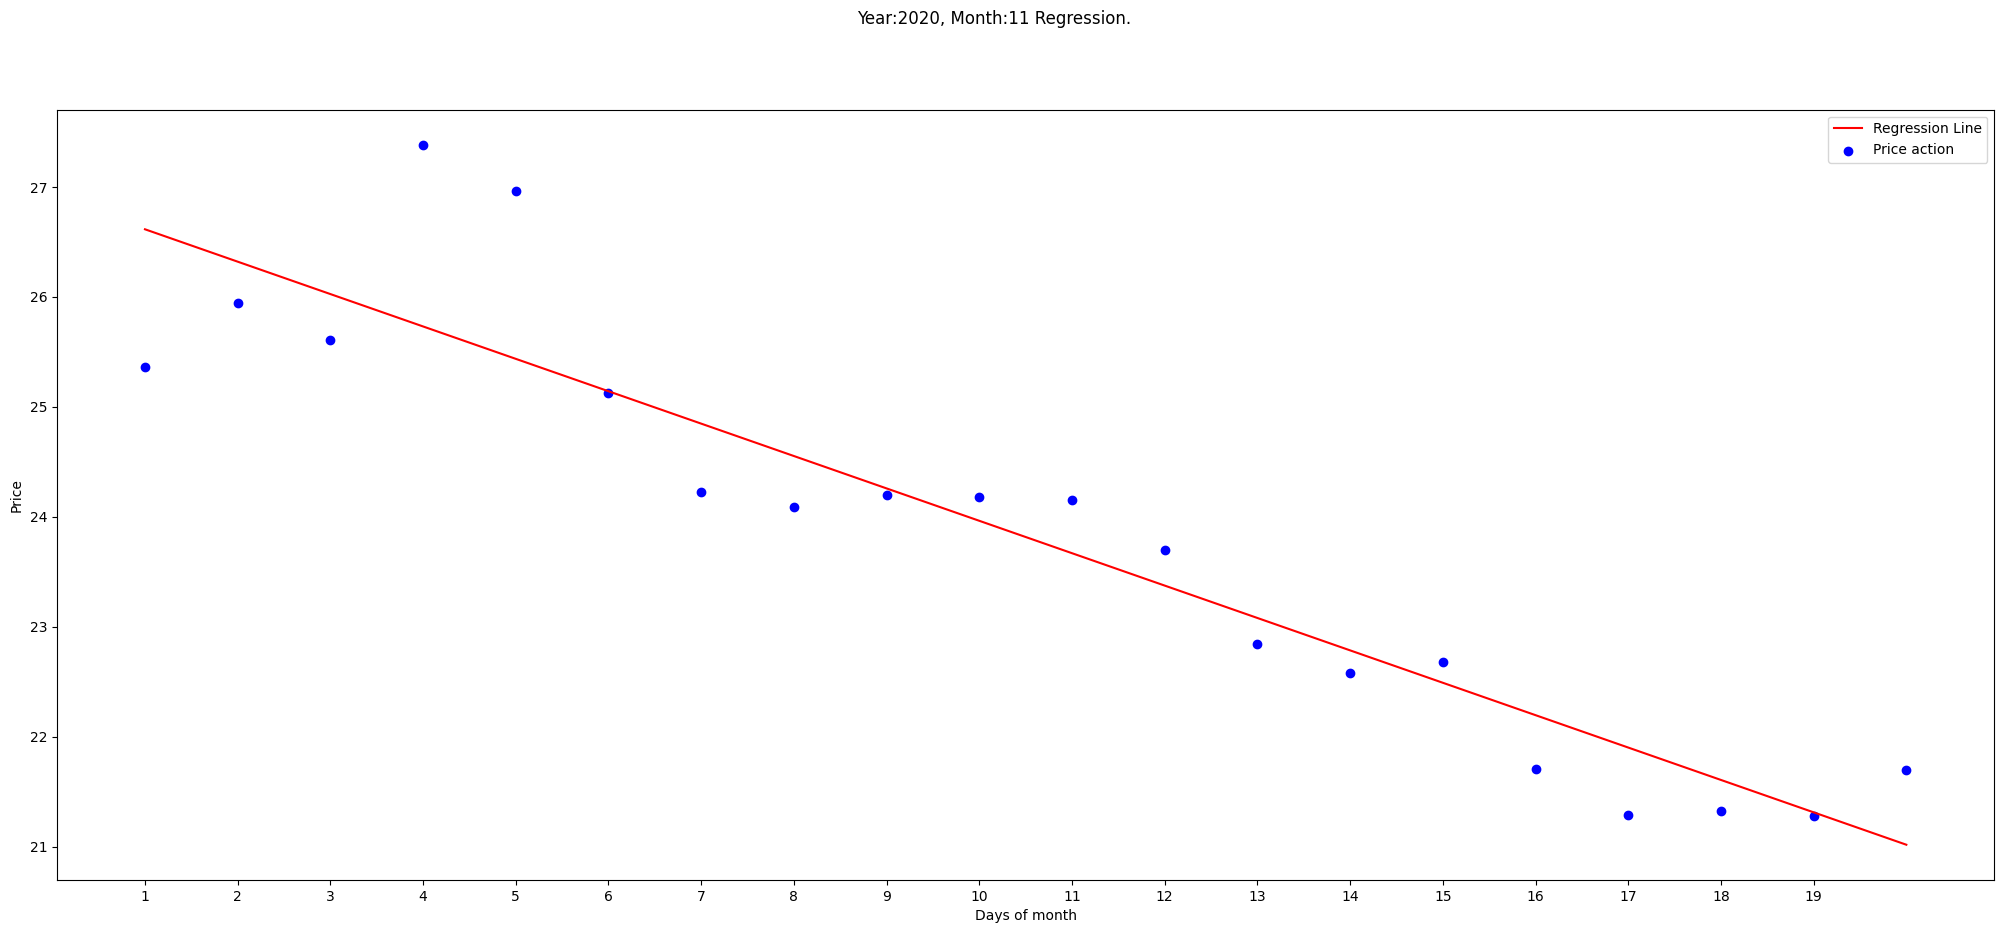

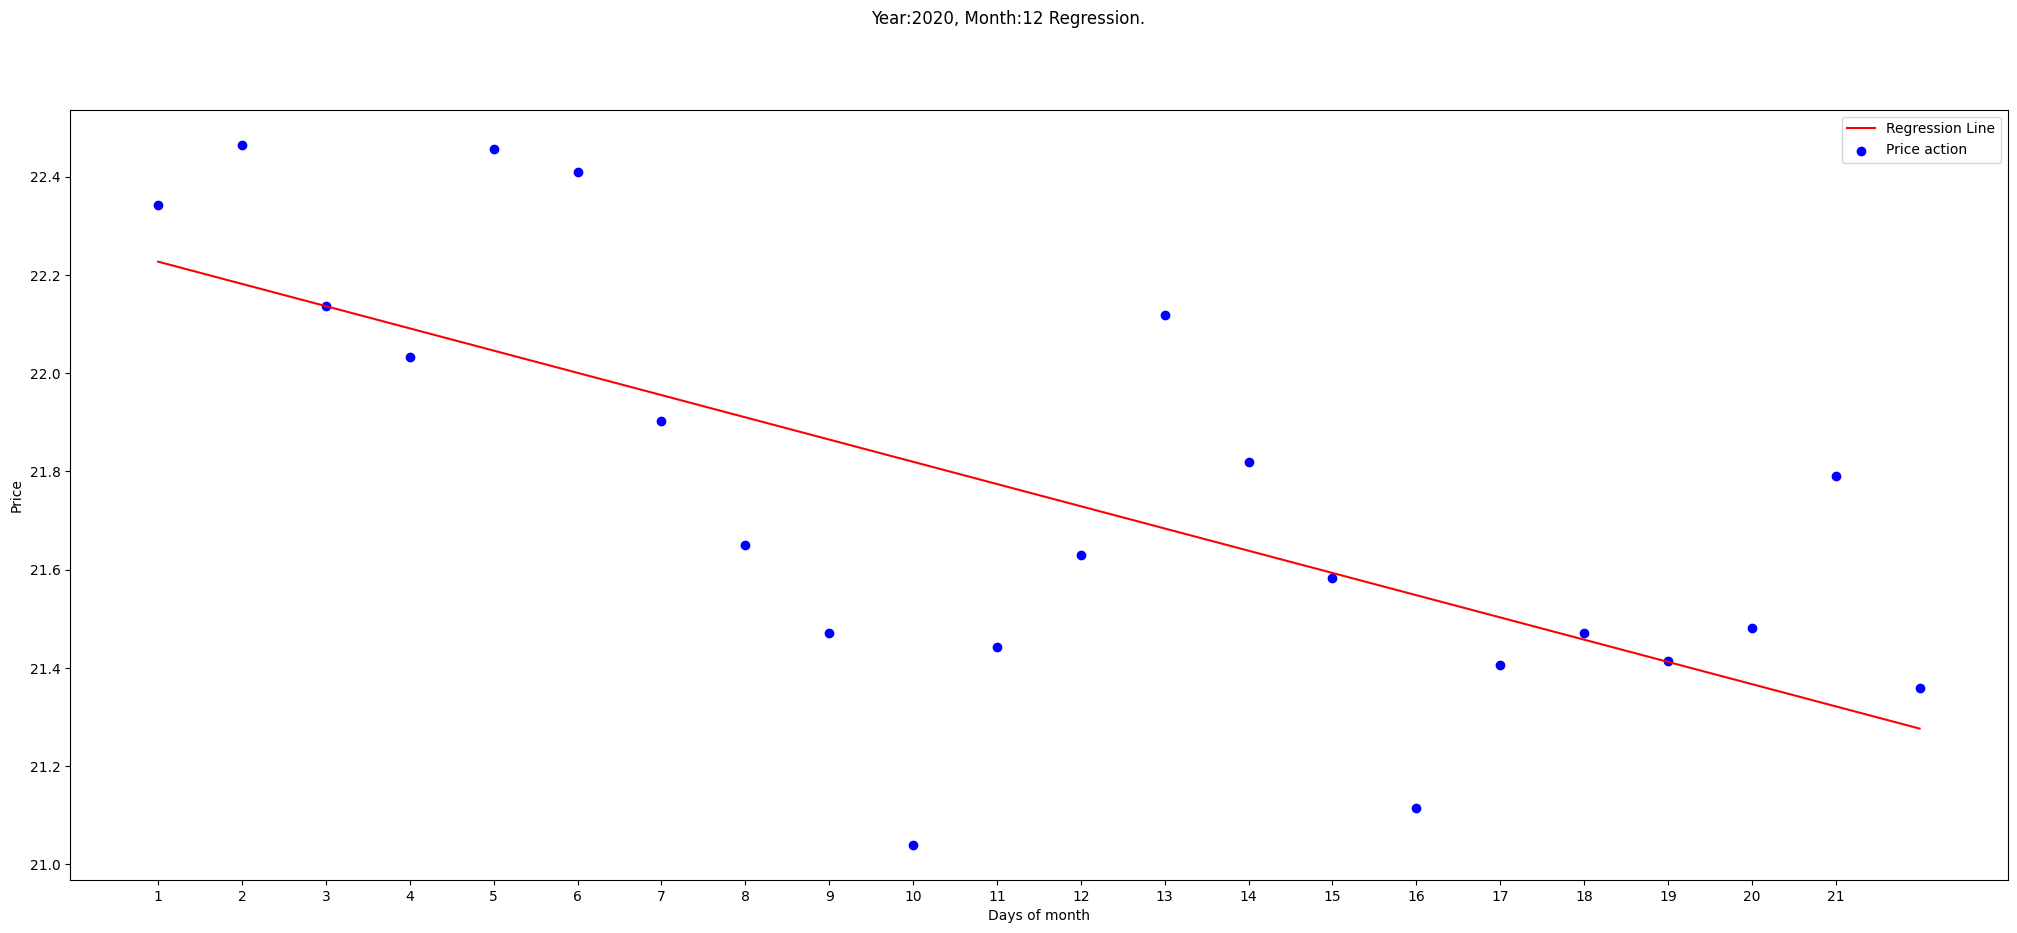

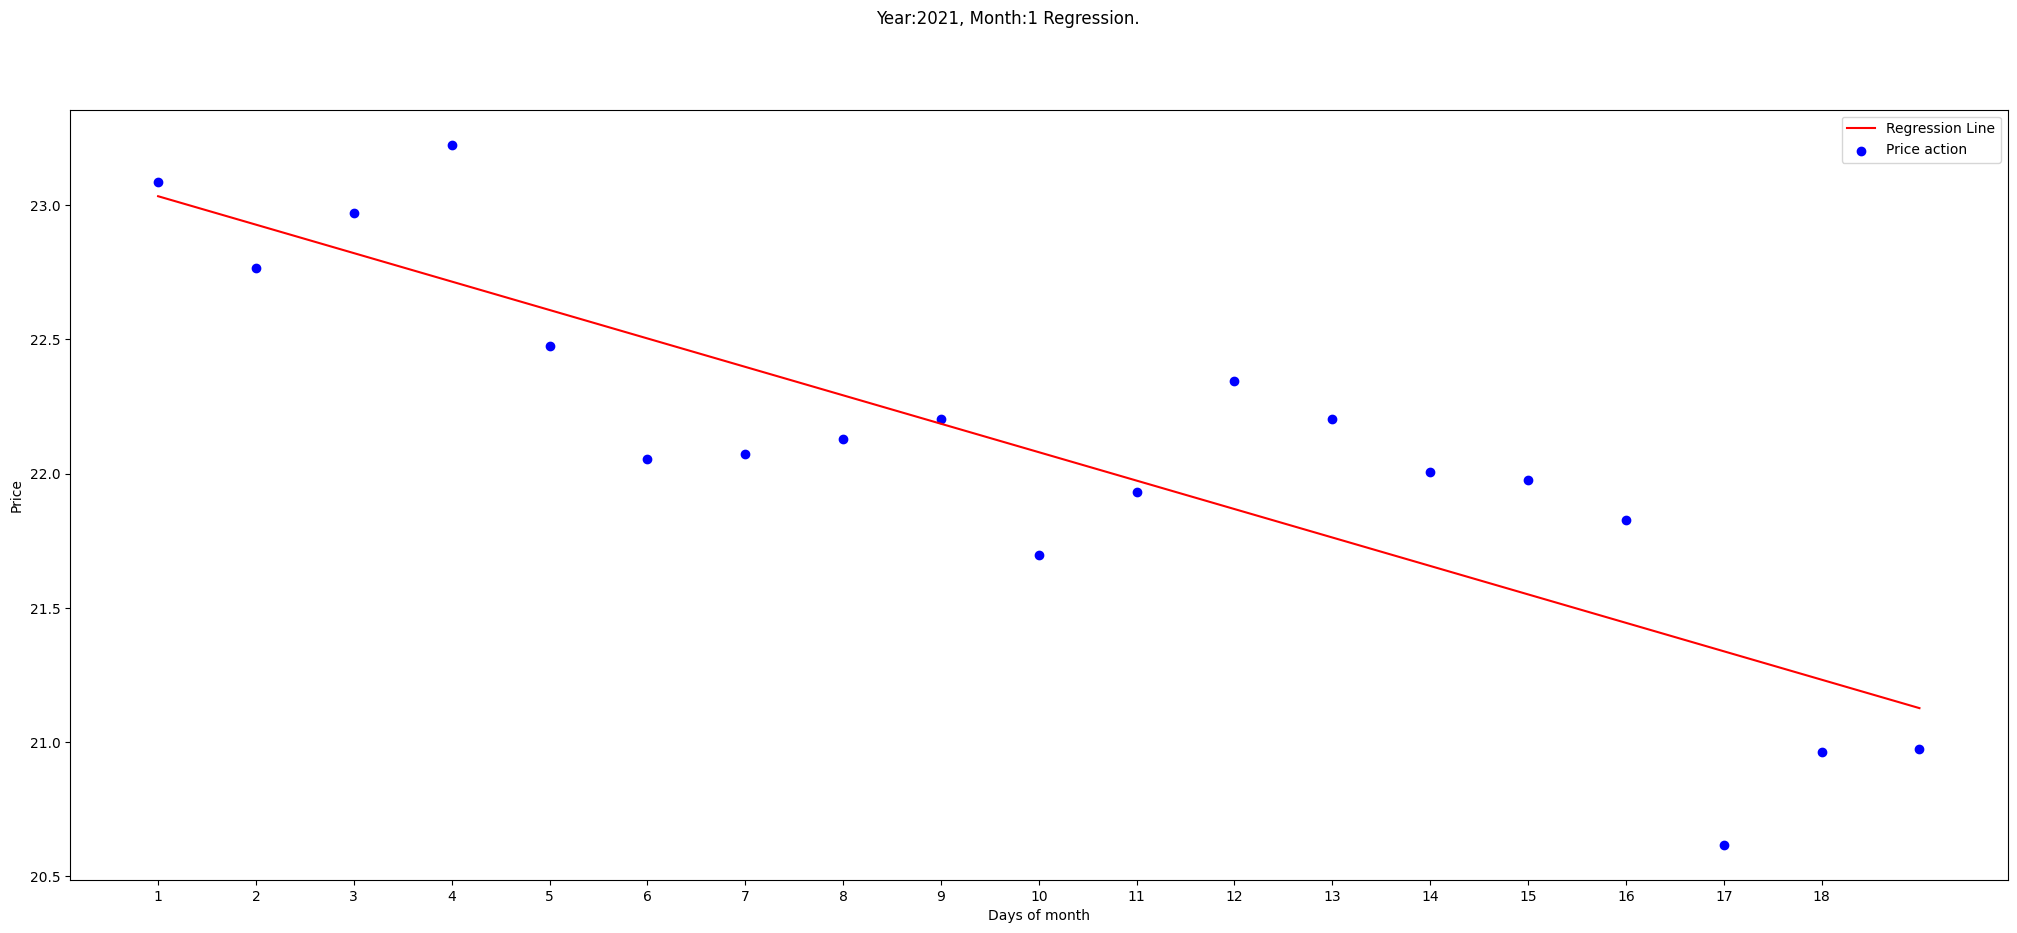

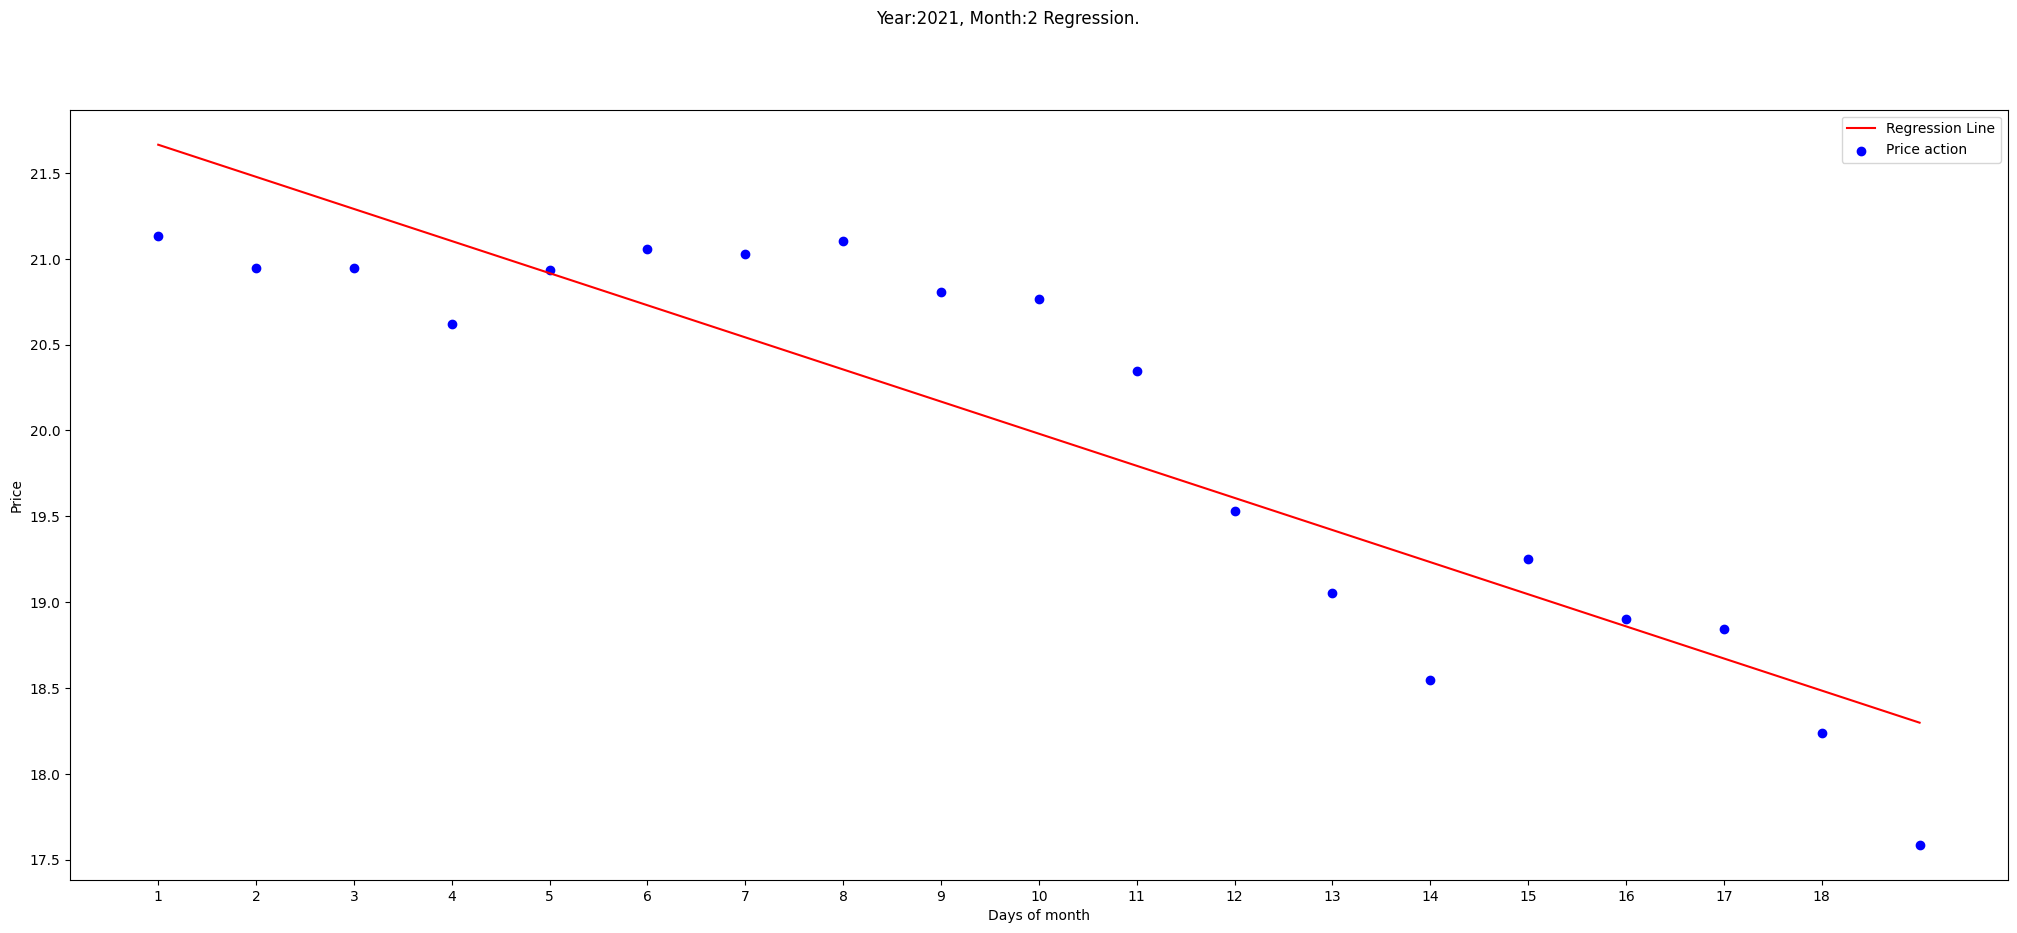

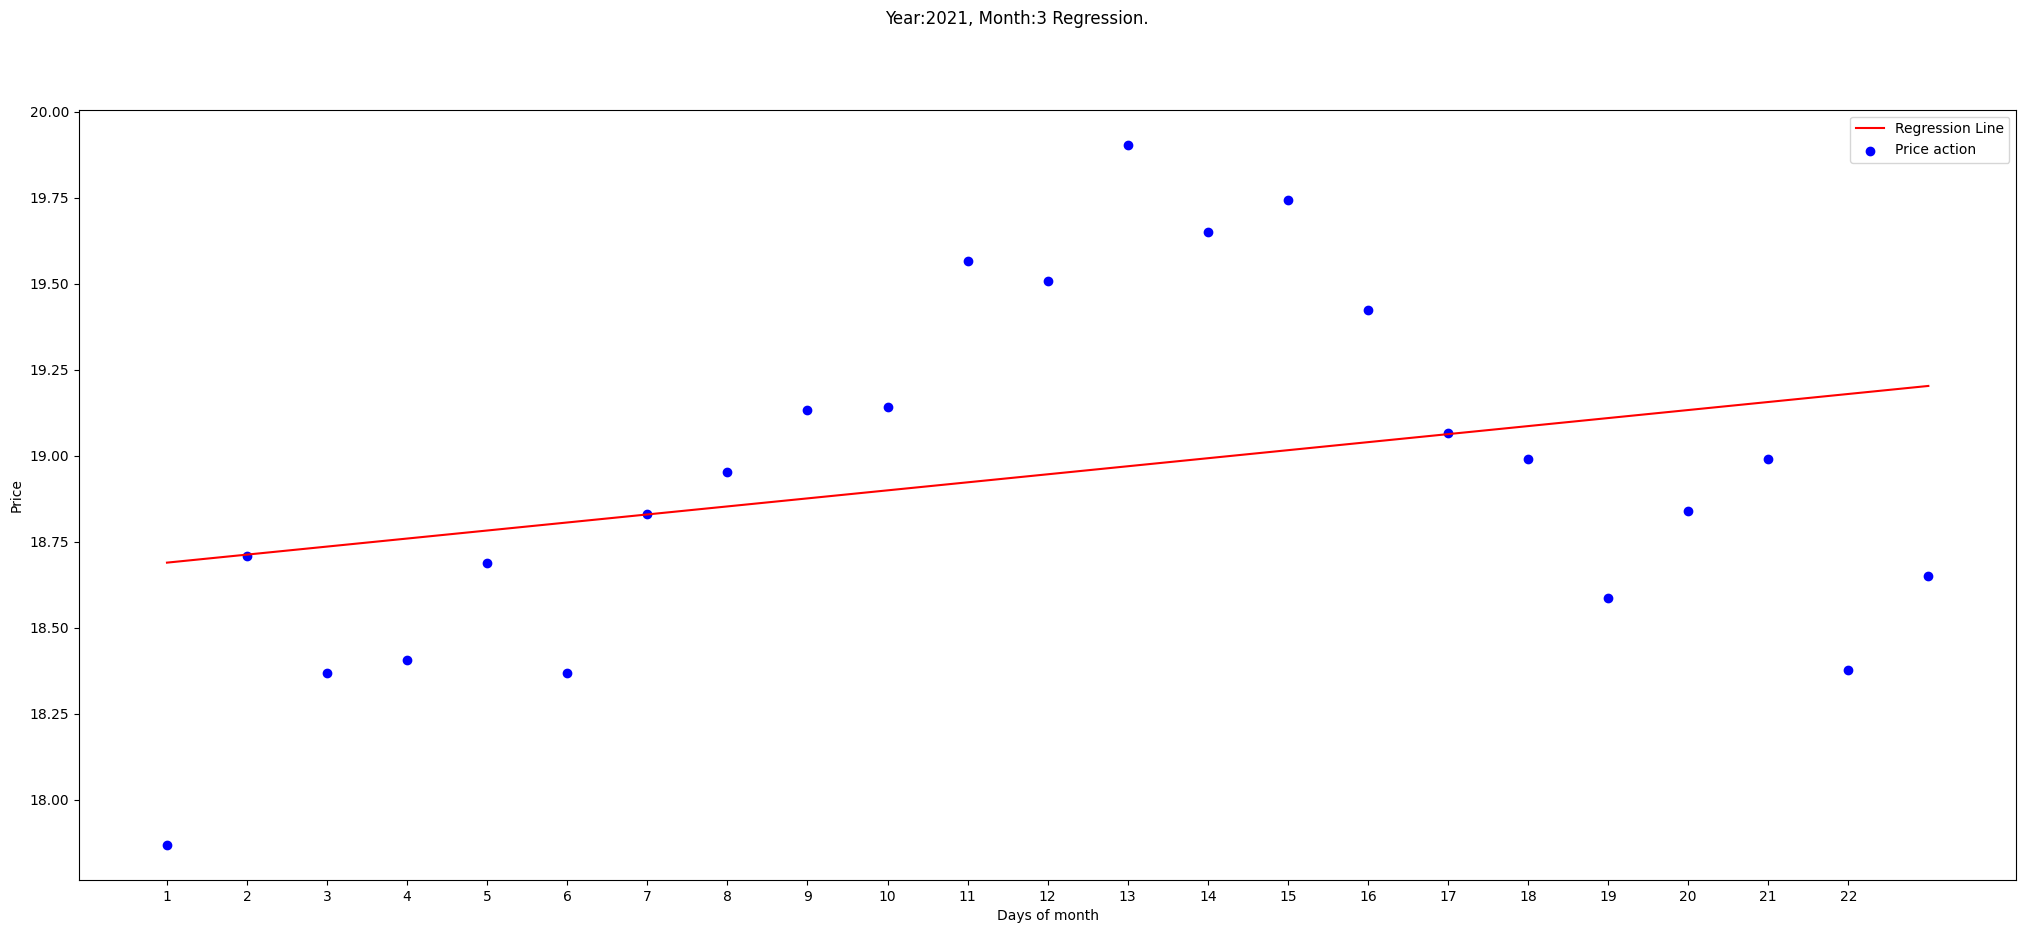

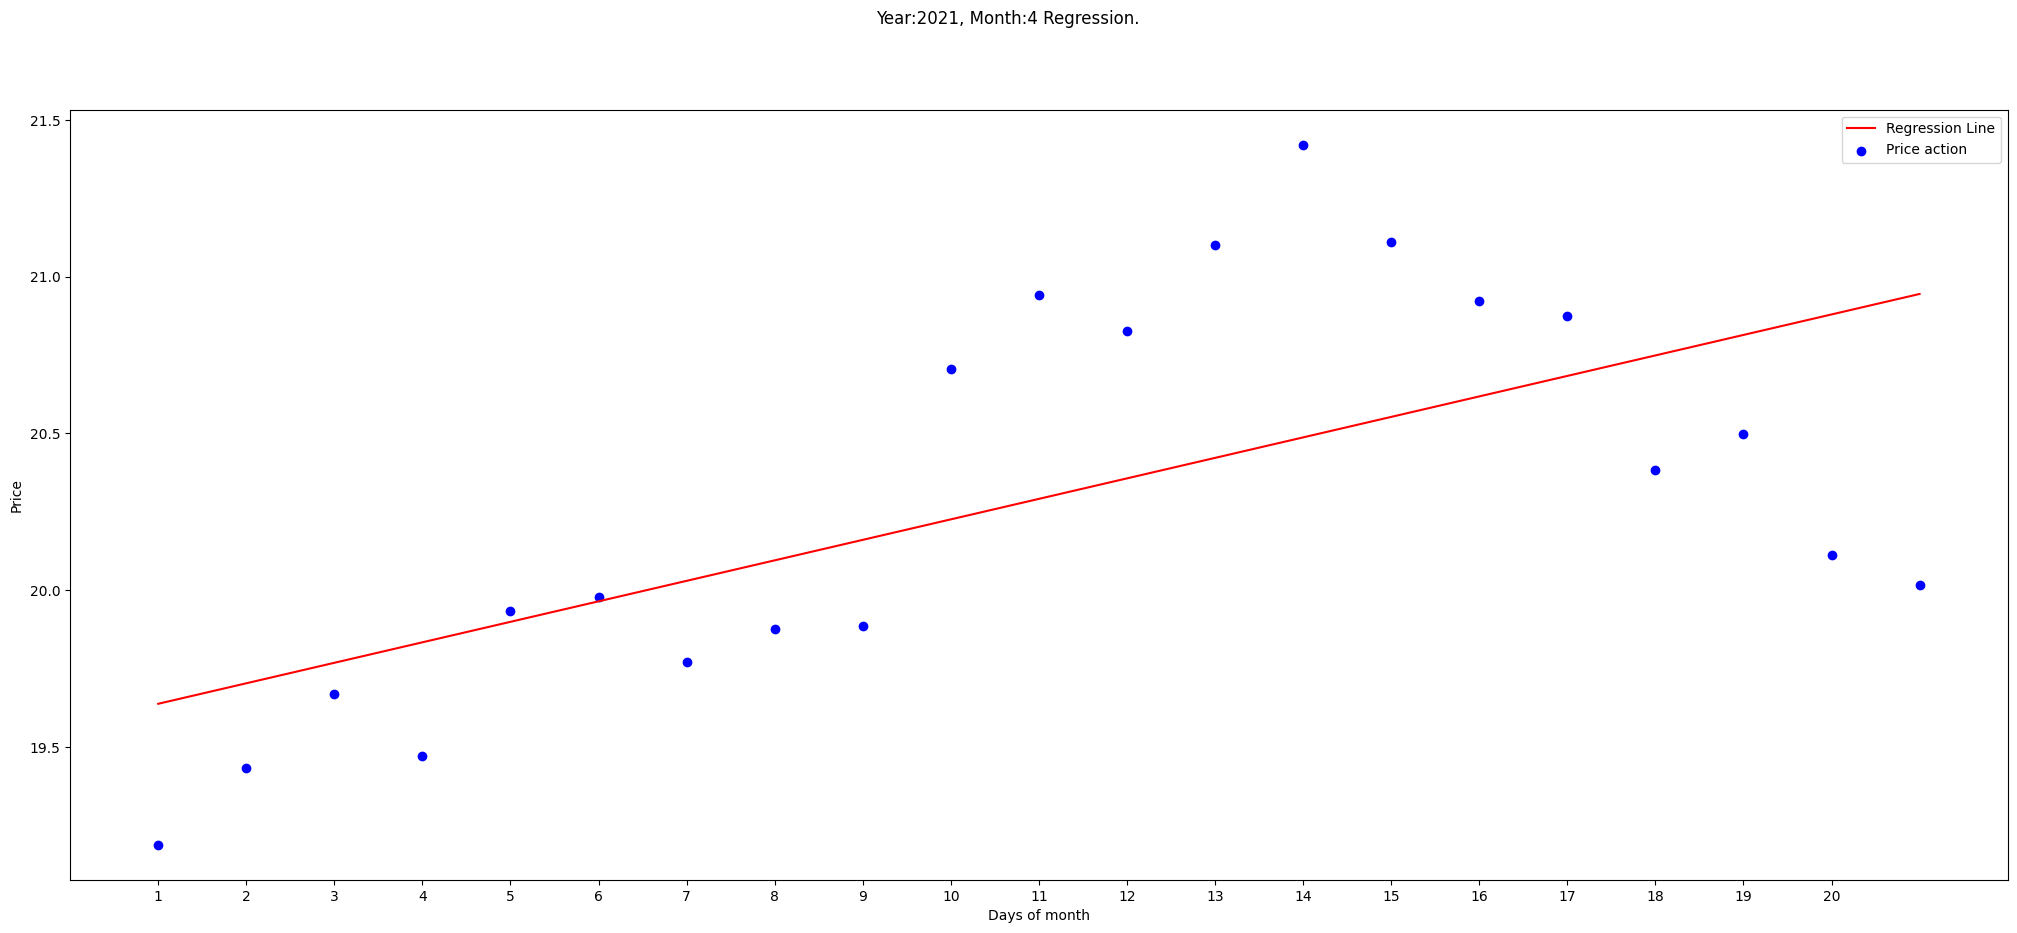

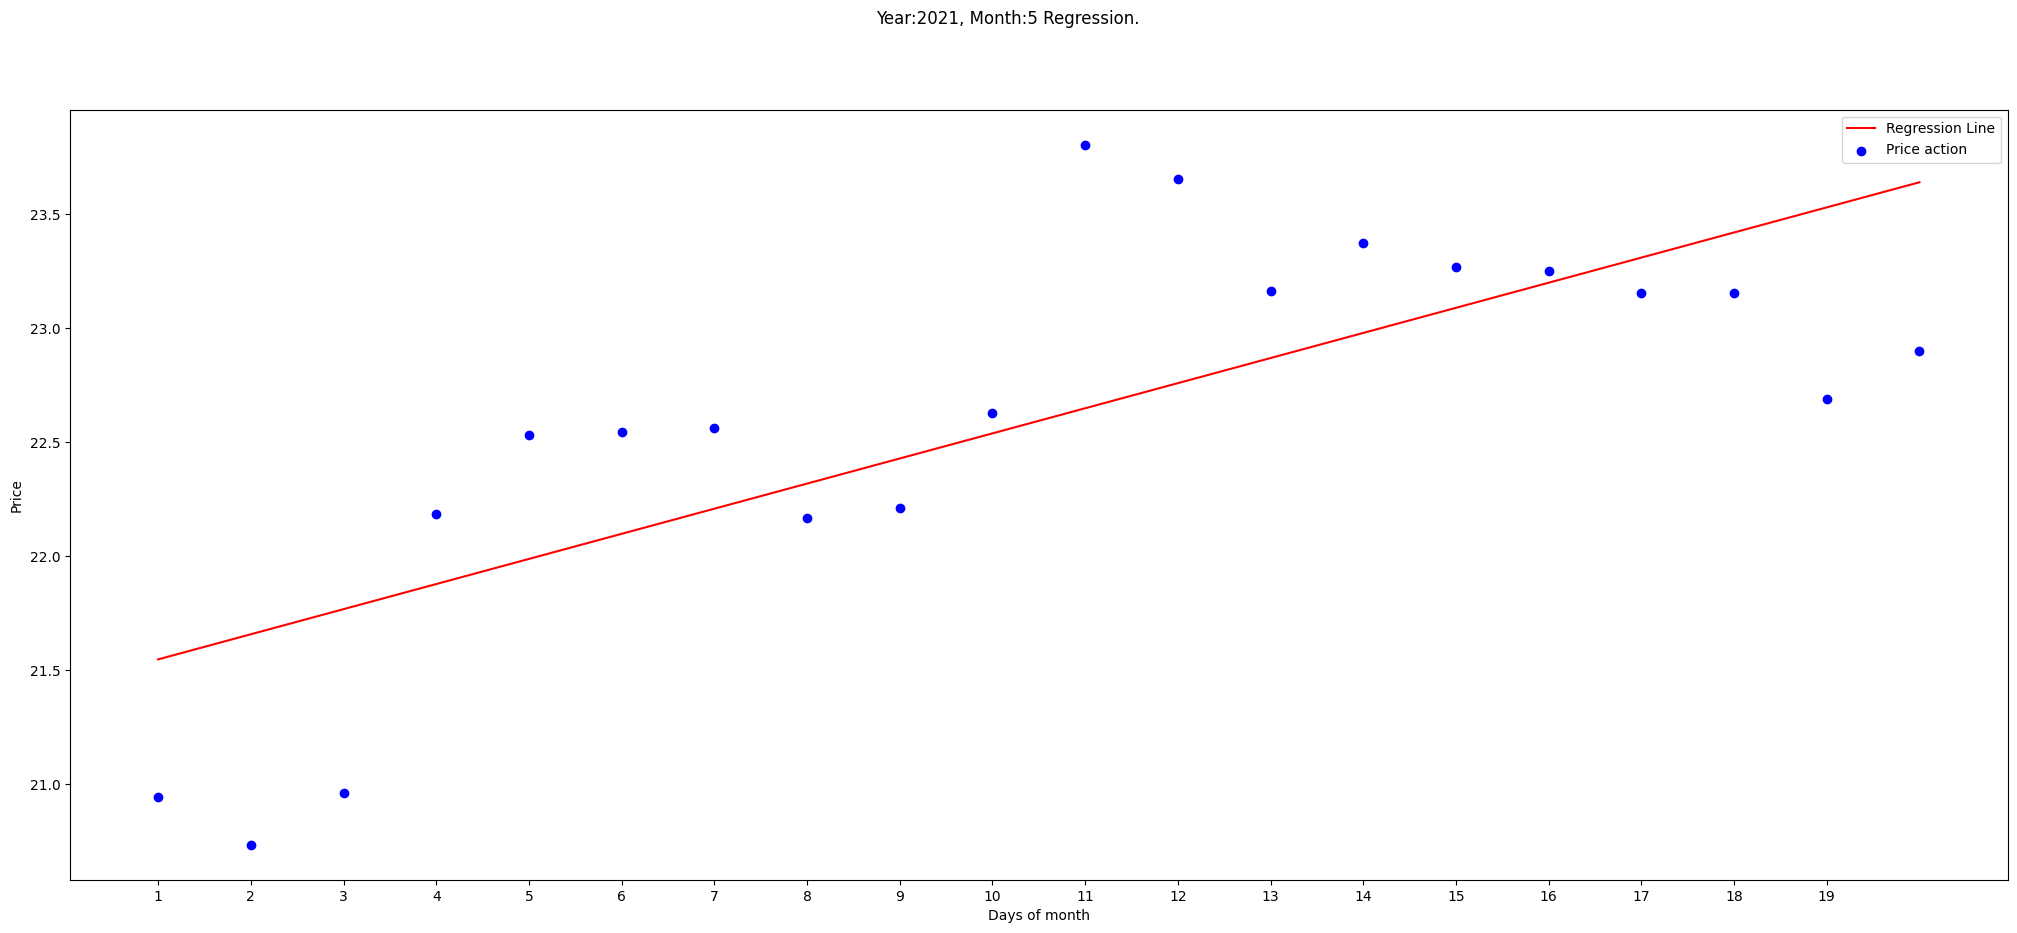

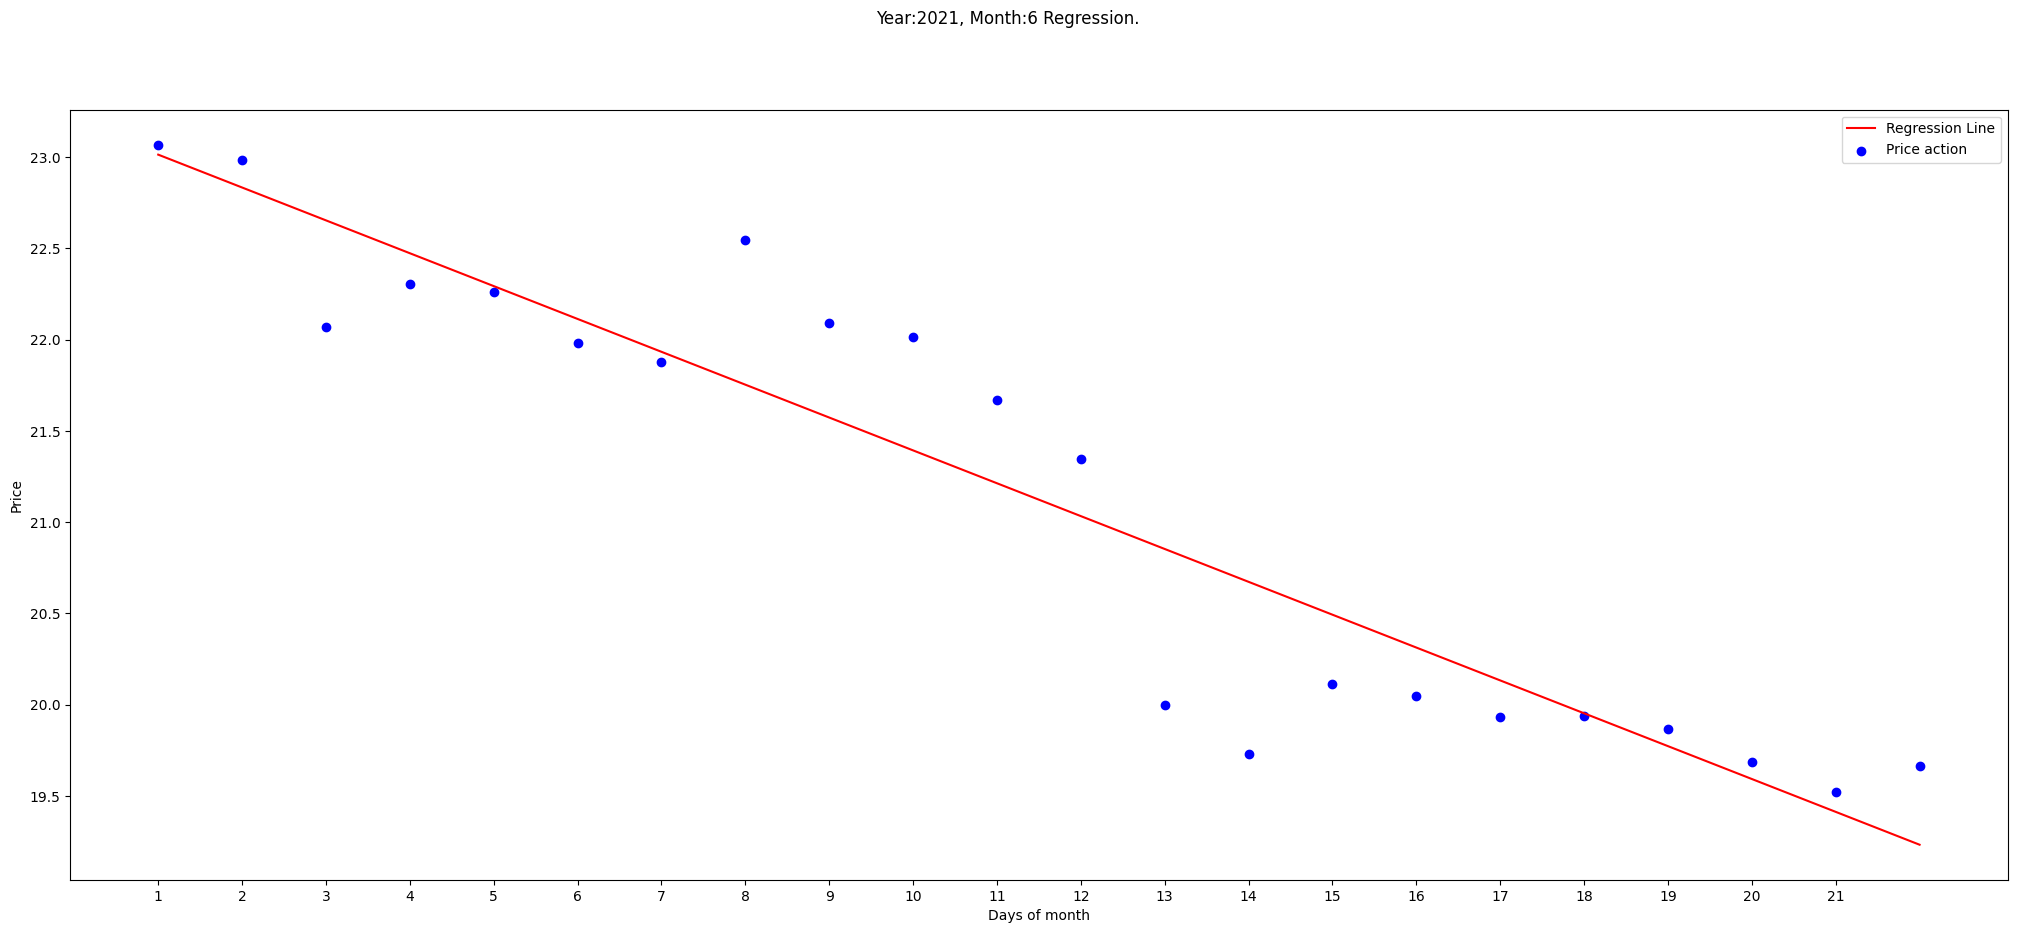

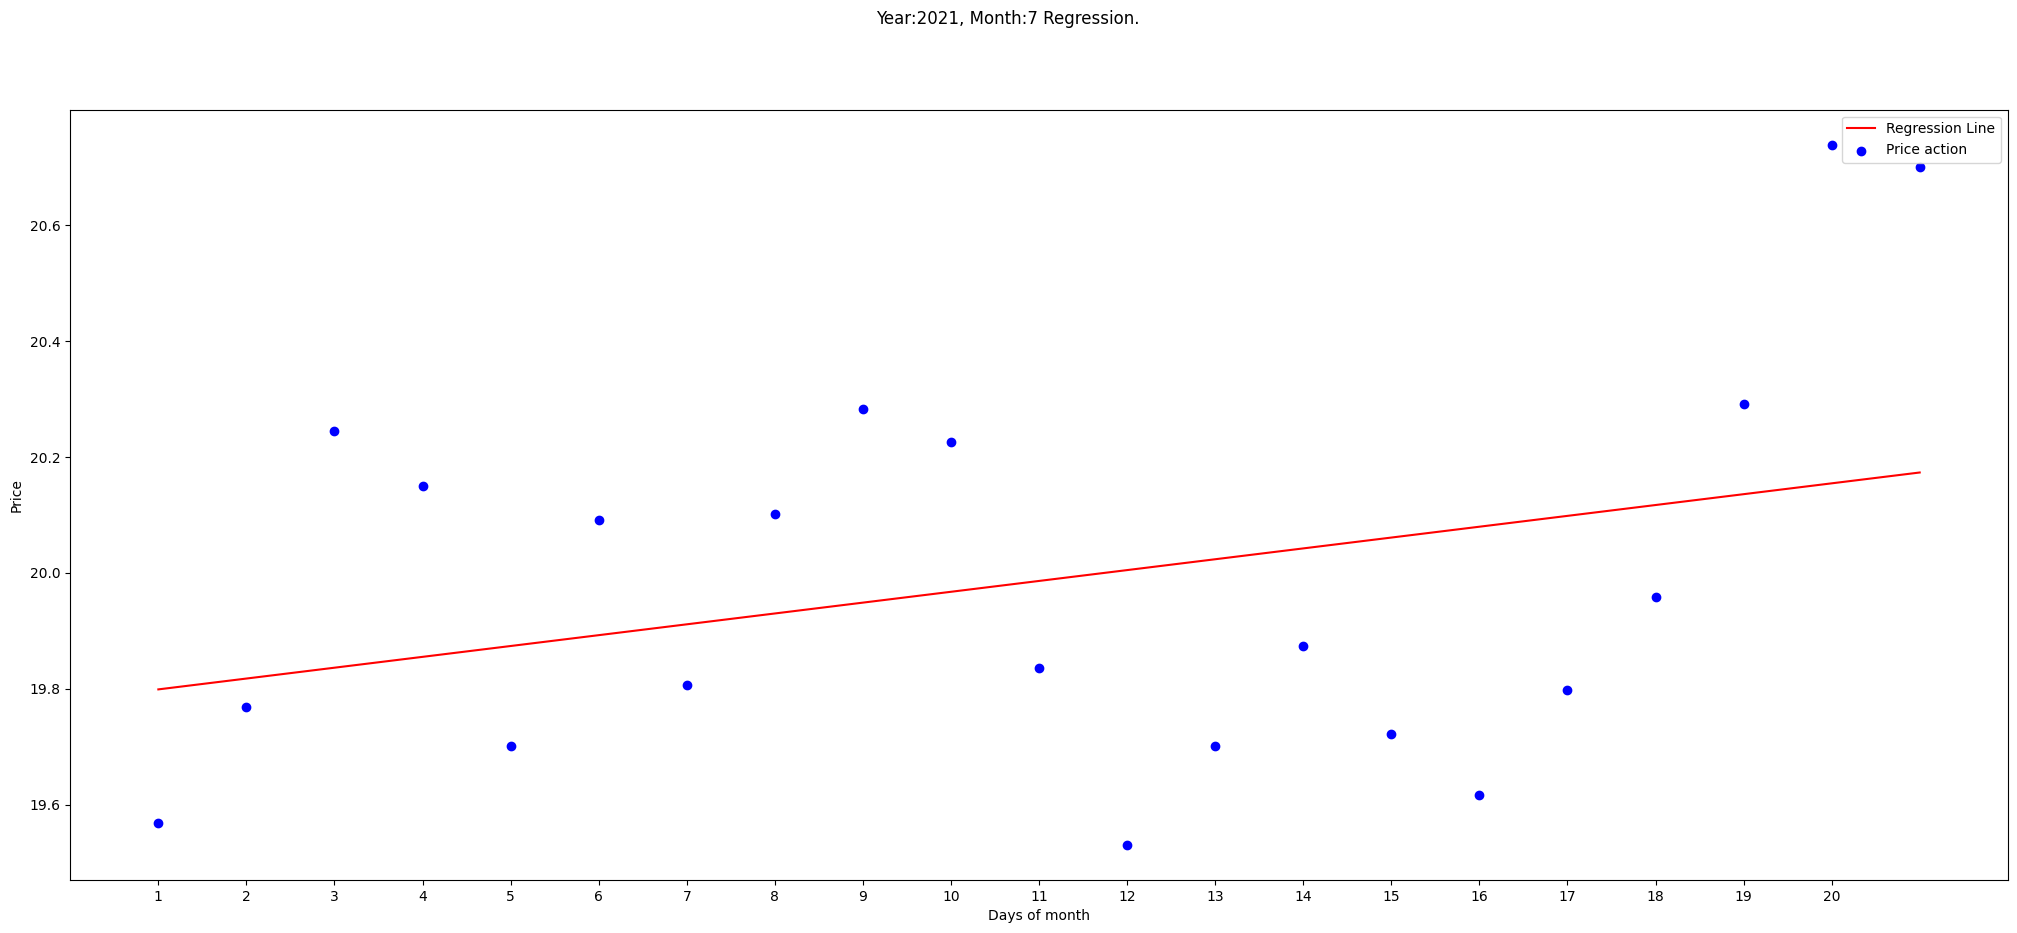

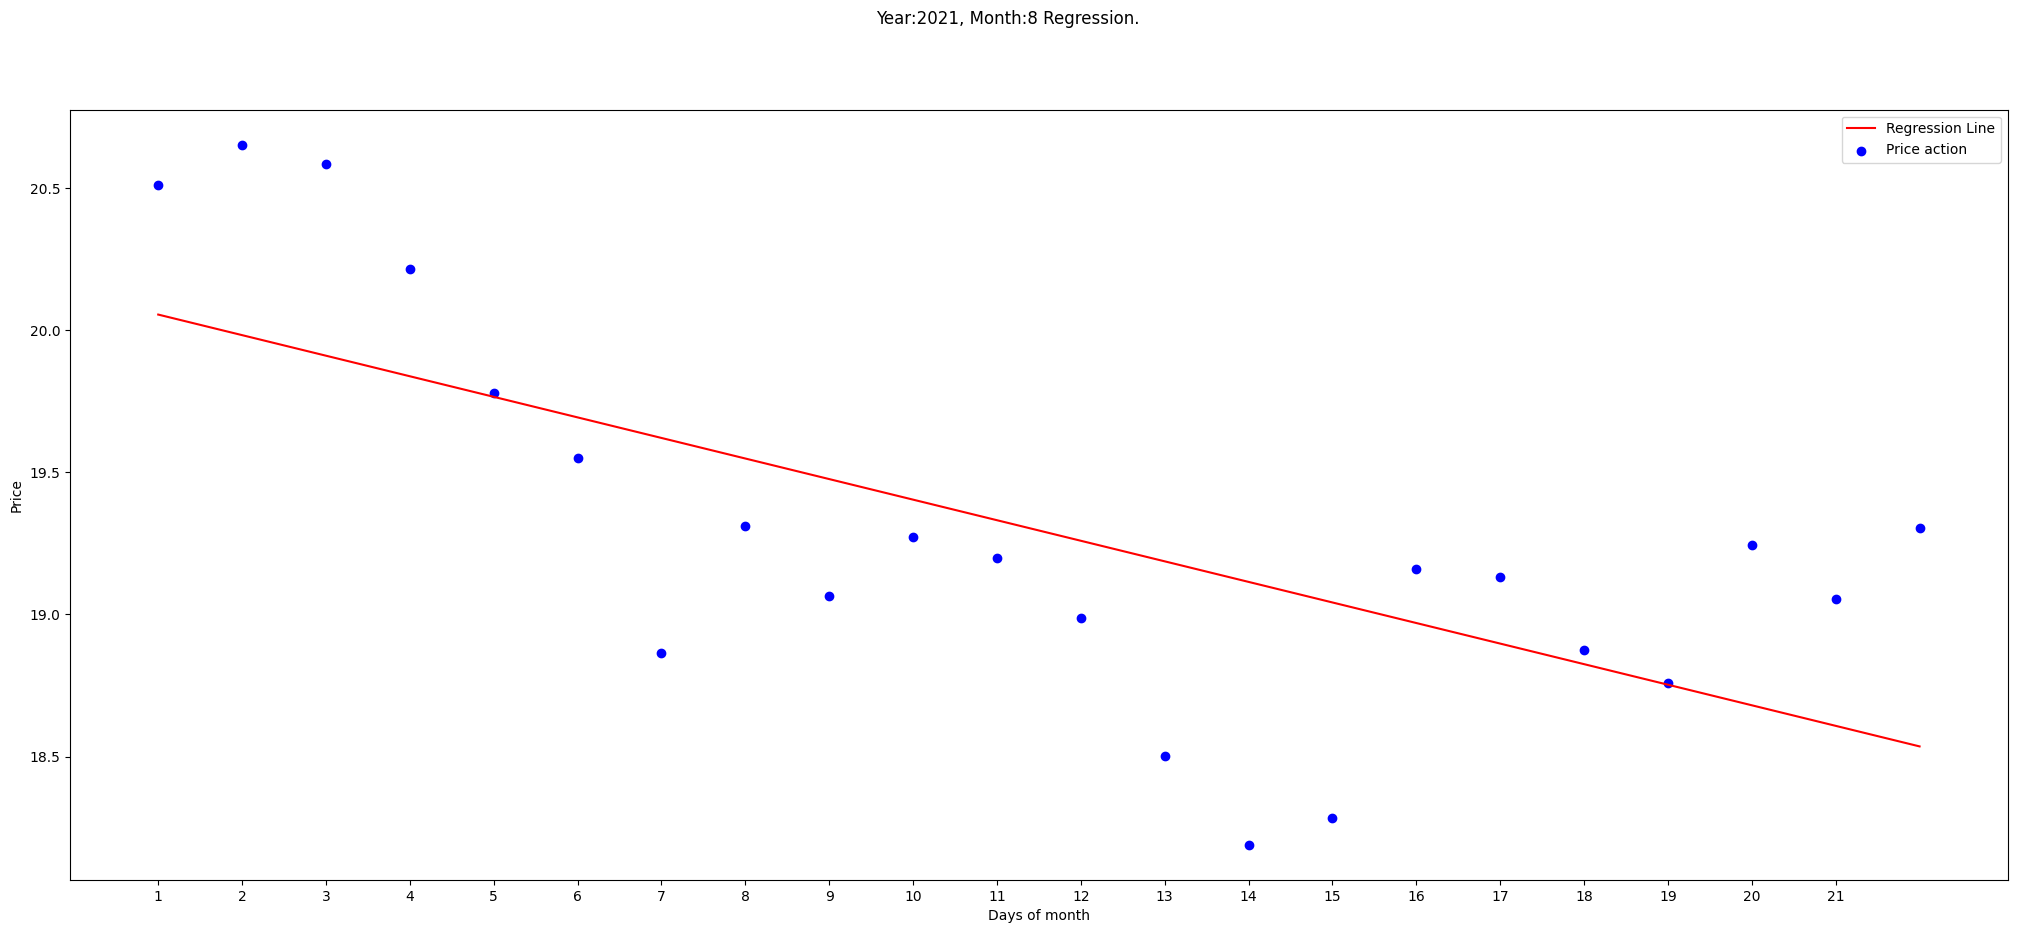

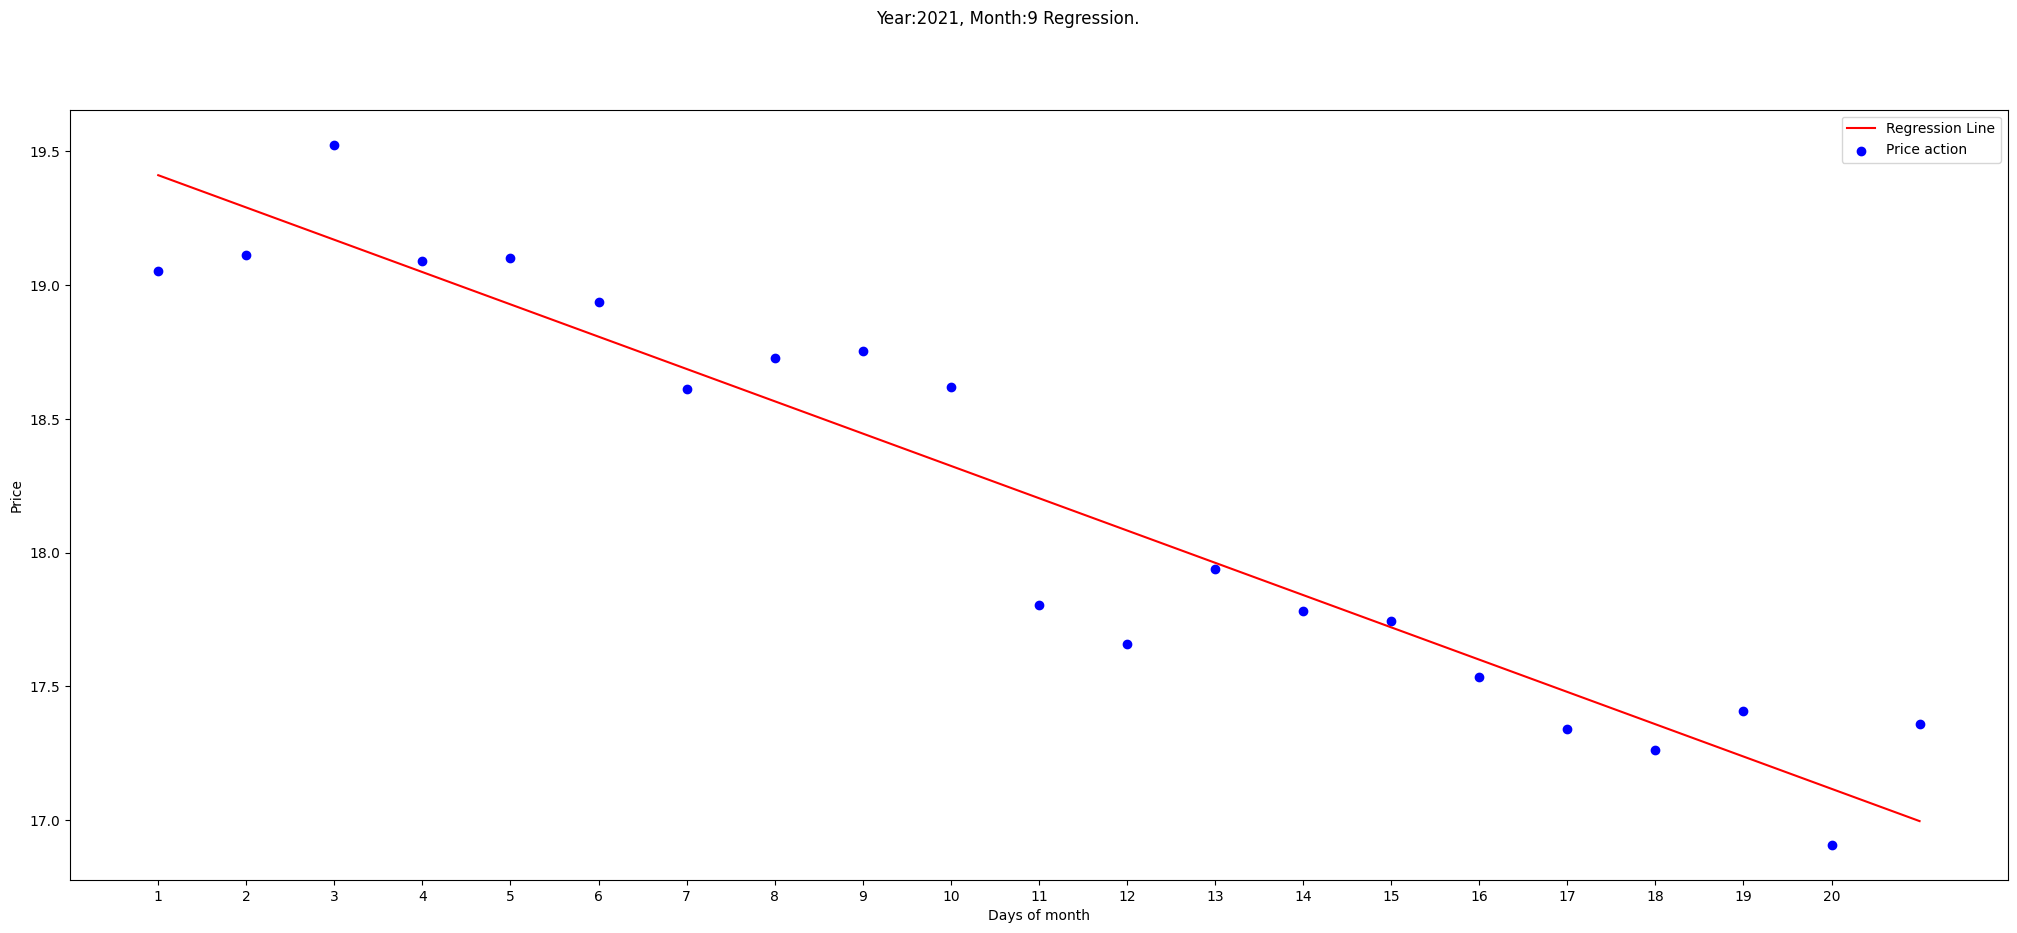

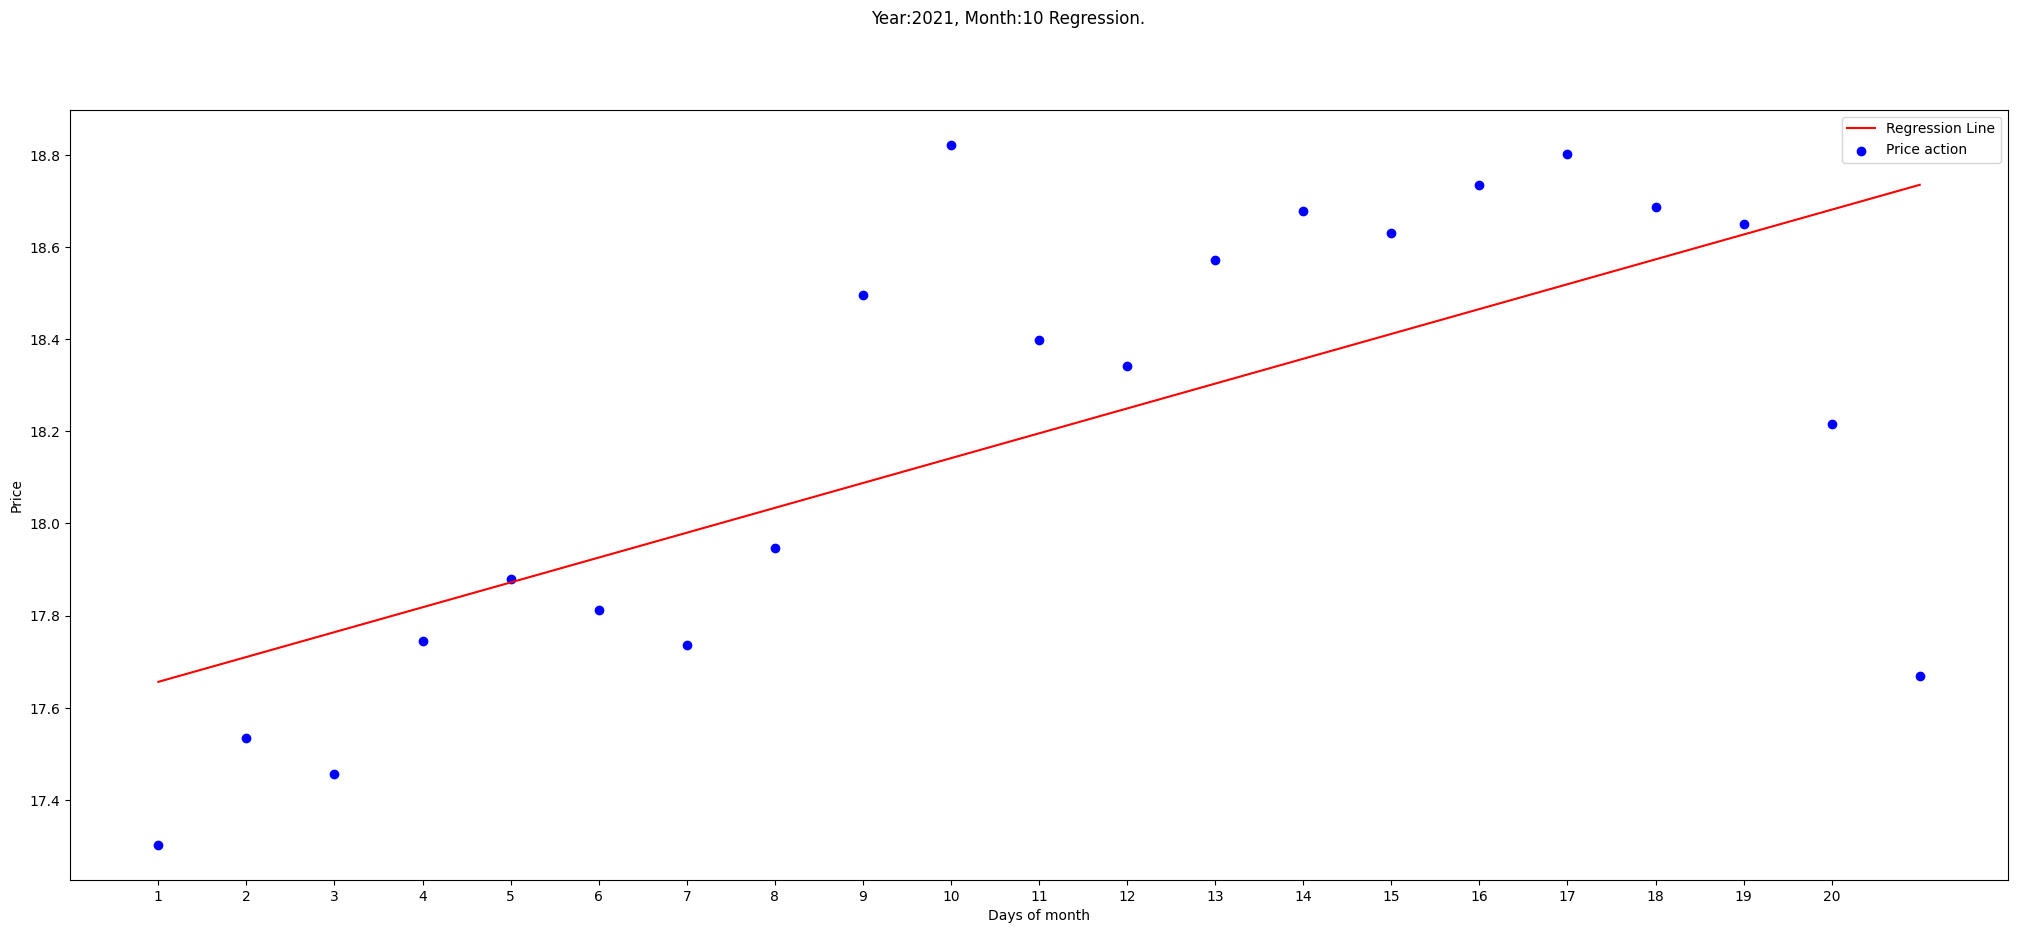

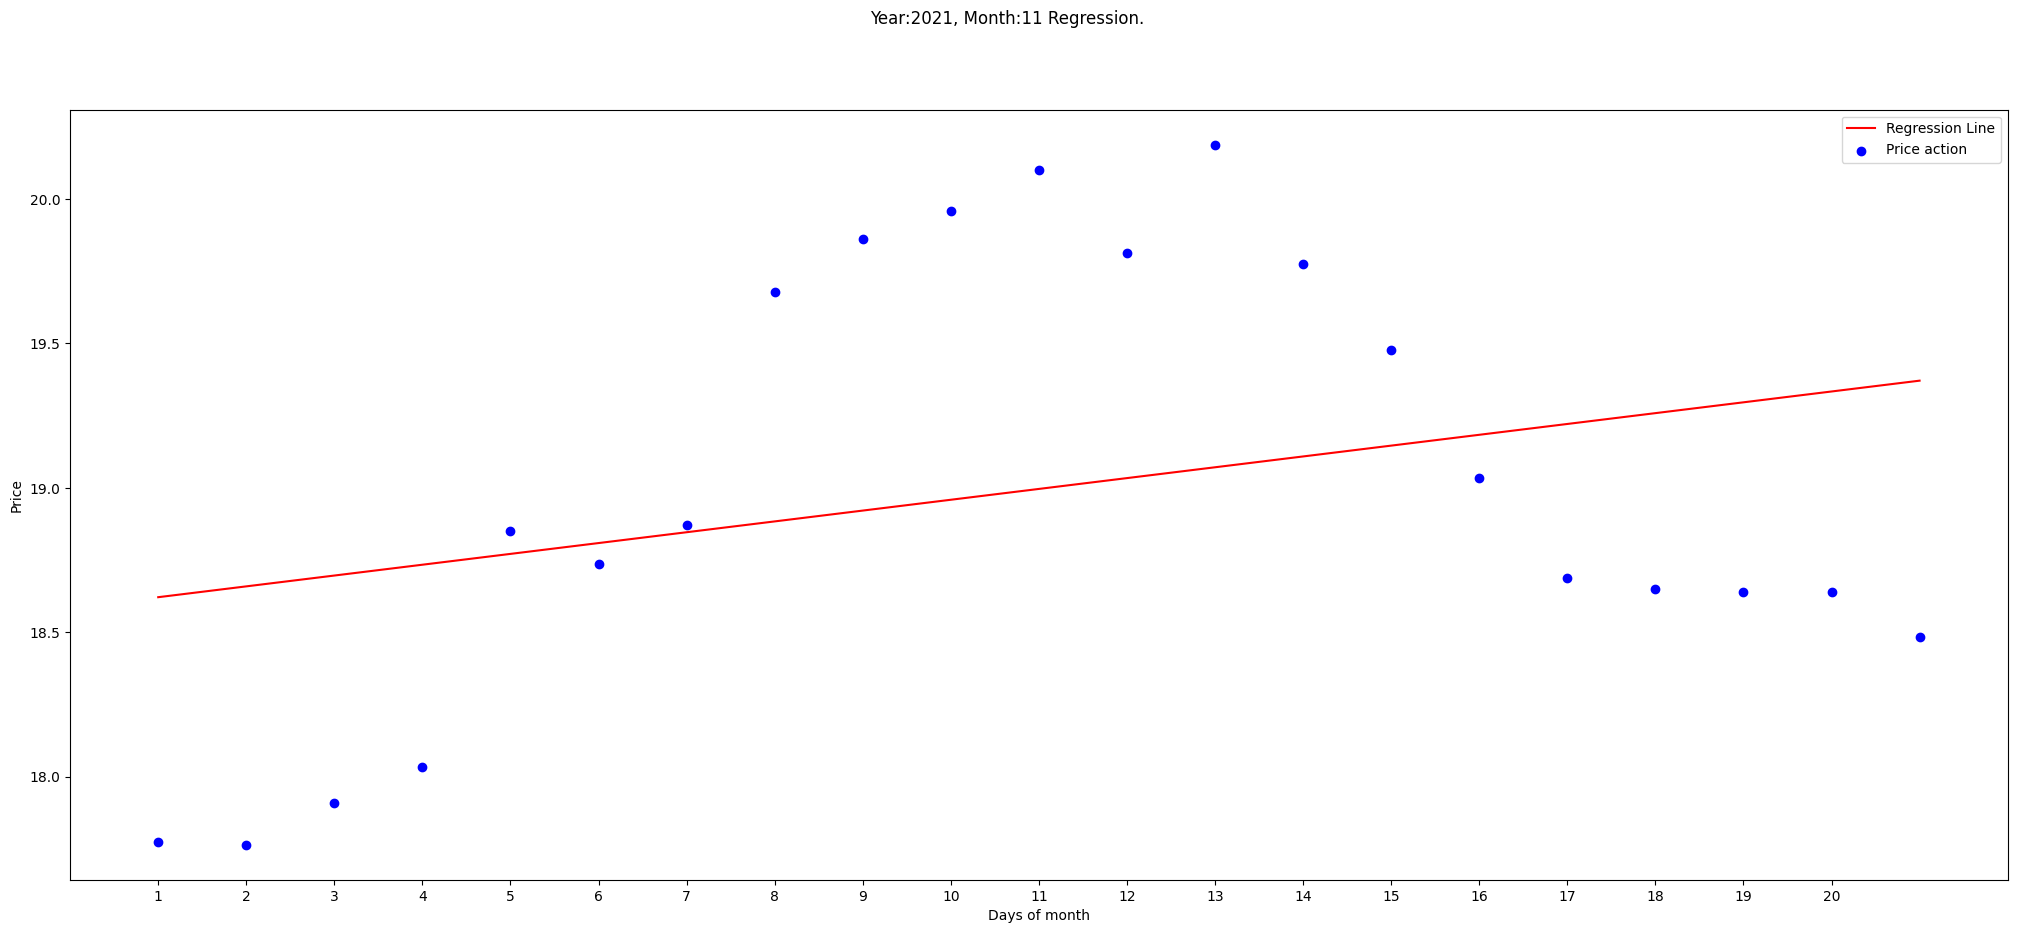

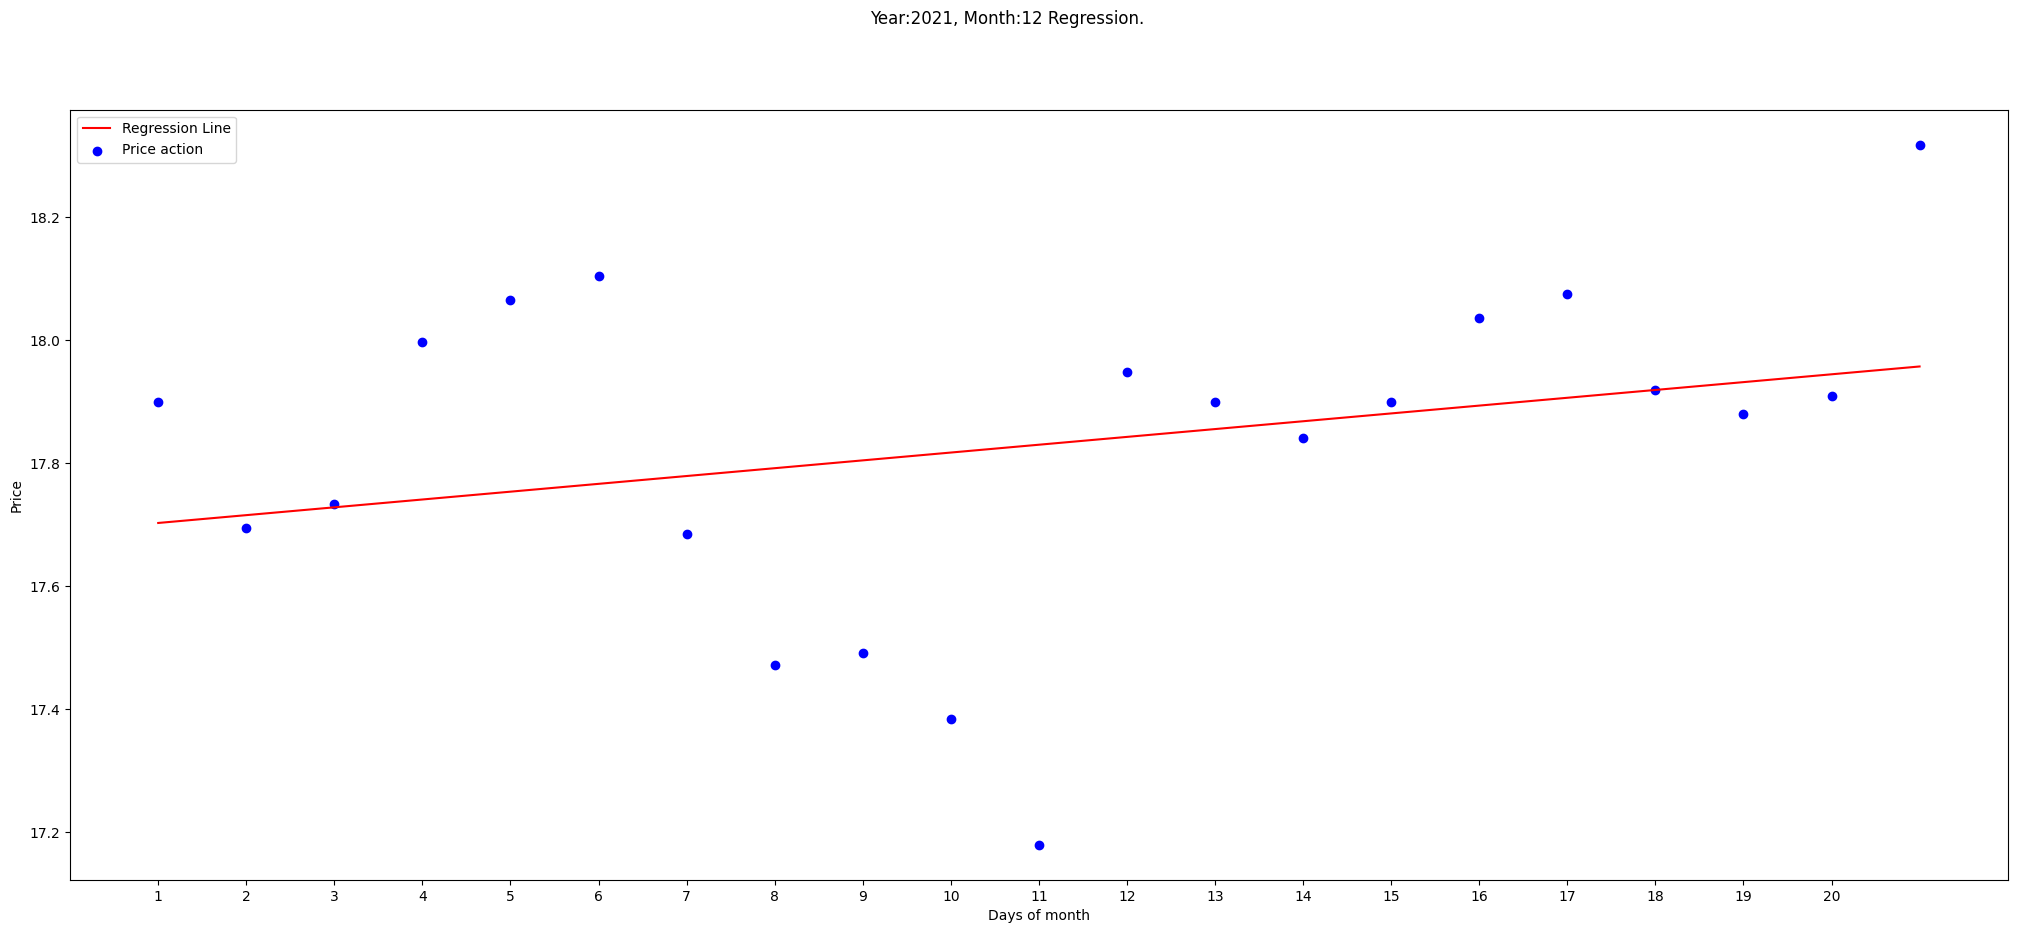

[[2, 2020, 5, 0.0758], [8, 2020, 16, 0.0866], [8, 2020, 18, 0.0975], [10, 2020, 3, 0.0923], [1, 2021, 3, 0.0991], [6, 2021, 3, 0.0665]]


In [6]:
ticker = "GOLD"
_dict = dict()
_list = list()
## SSE
for year in [2020, 2021]:
    _dict[year] = dict()
    df = pd.read_csv(f"/content/sample_data/weekly_return_detailed.csv")
    df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")
    df["Month"] = df.apply(find_month, axis = 1)
    df = df.loc[df["Year"] == year]
    months = df['Month'].unique().tolist()
    for month in months:
        _dict[year][month] = dict()
        d_month = df.loc[df["Month"] == month].reset_index()
        d_month["index"] = d_month.index + 1

        sse_t = linear_regression(d_month, plot = True)
        _dict[year][month] = dict()
        _dict[year][month]["SSE"] = sse_t
           
        # Split & find SSE:SSE(L1), SSE(L2)
      
        _dict[year][month]["SSE_sub"] = dict()
        least_i = None
        least_sum = None
        for i in range(2, len(d_month)-1):
            t1 = linear_regression(d_month[:i])
            t2 = linear_regression(d_month[i:])
            sum_t = round(t1 + t2, 2)
            if least_sum is None:
                least_sum = sum_t
                least_i = i
            if least_sum > sum_t:
                least_sum = sum_t
                least_i = i
            _dict[year][month]["SSE_sub"][i] = round(sum_t, 2)
            if t1 + t2 < sse_t:
                f = round(((sse_t - (t1 + t2))/2) * ((len(d_month)-4)/(t1 + t2)), 4)
                critical_value = 0.1
                if f < critical_value:
                    _list.append([month, year, i + 1, f])
print(_list)

In [7]:
f_df = pd.DataFrame(_list, columns = ["Month", "Year", "k", "F-Stats"])
f_df = f_df.sort_values(by = ["Year", "Month", "F-Stats"], ascending = True).drop_duplicates(subset = ["Month"], keep = 'last')
f_df

,Month,Year,k,F-Stats
0,2,2020,5,0.0758
2,8,2020,18,0.0975
3,10,2020,3,0.0923
4,1,2021,3,0.0991
5,6,2021,3,0.0665


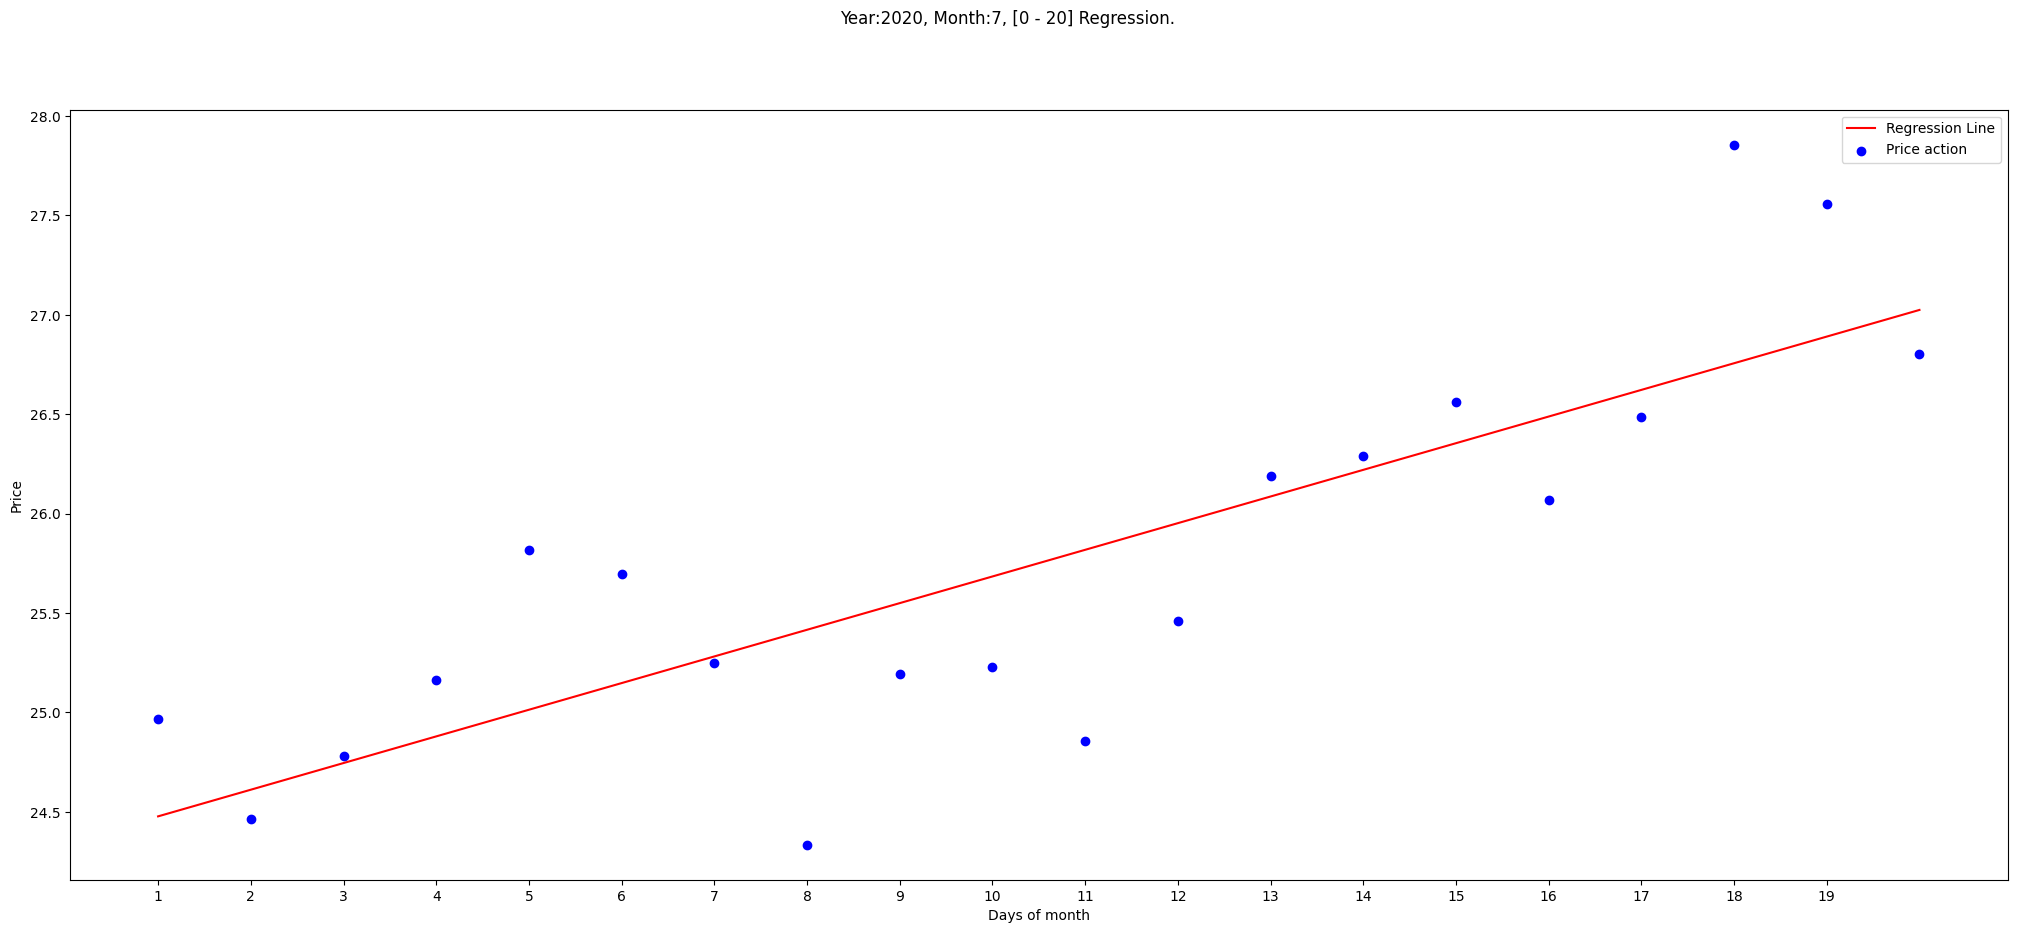

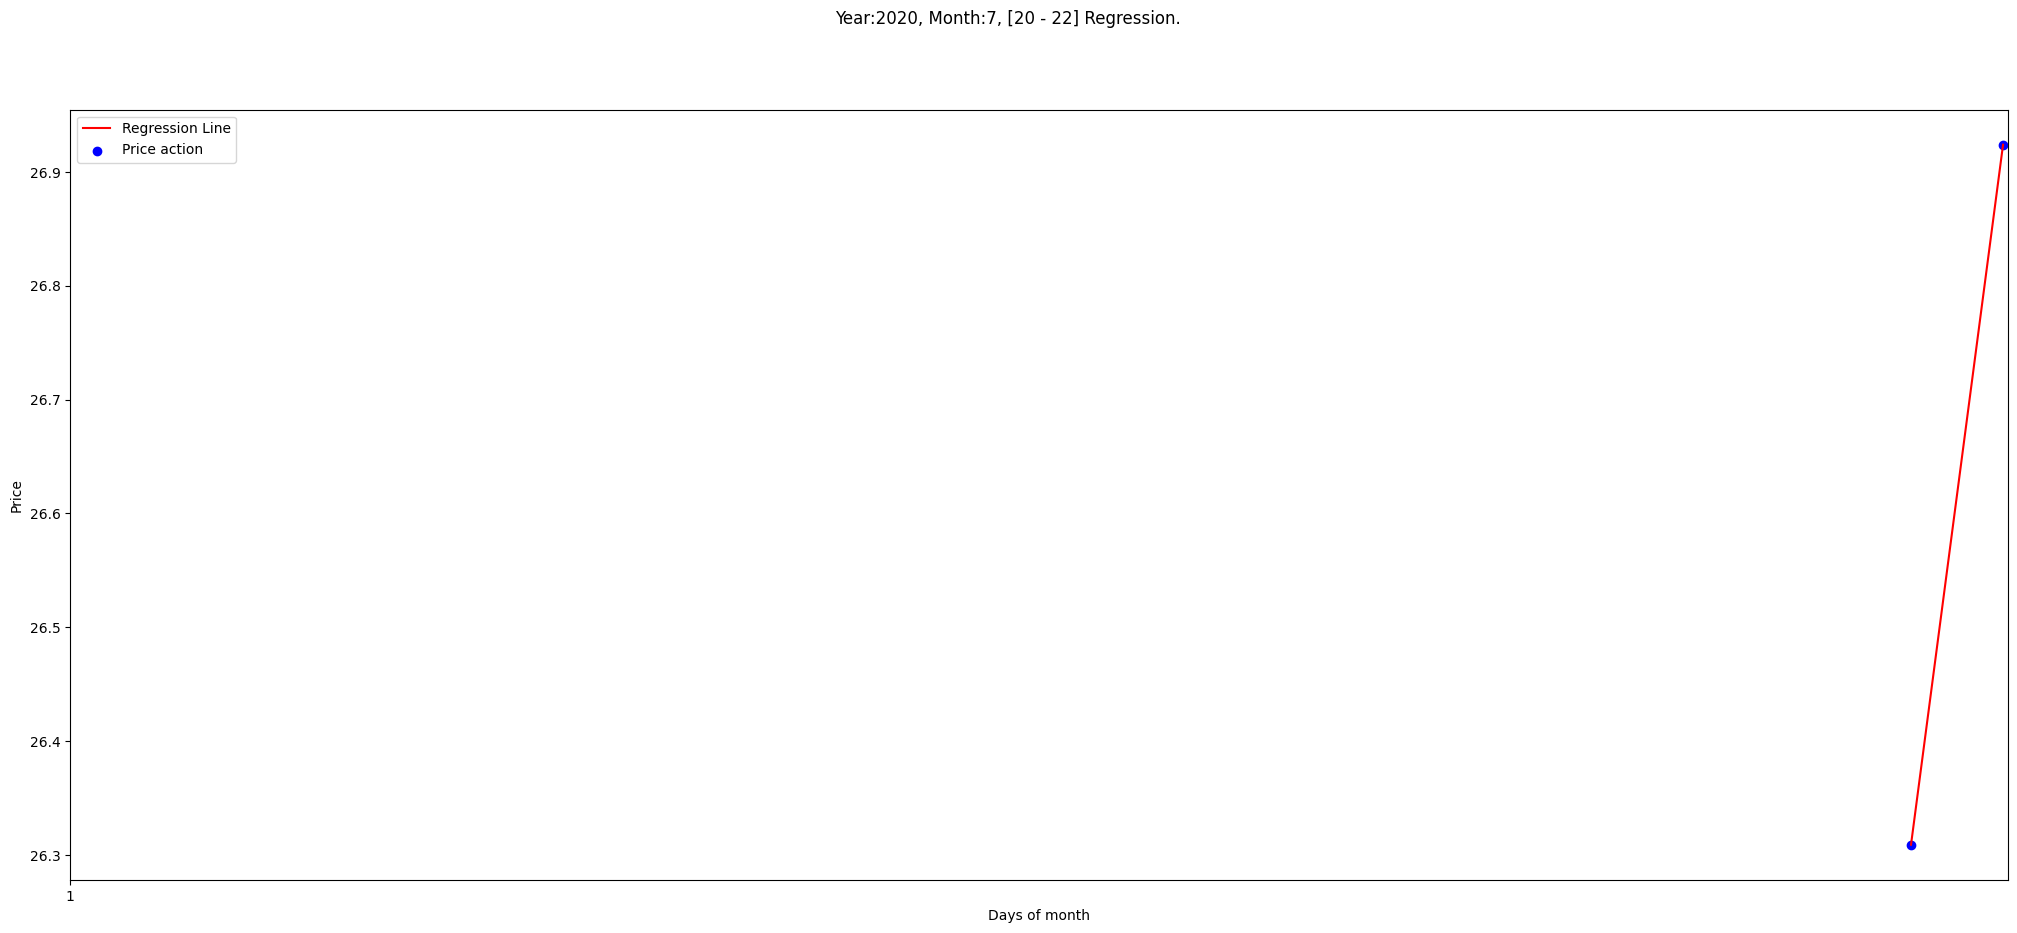

------------------------------------------------------------------------------------------------------------------------


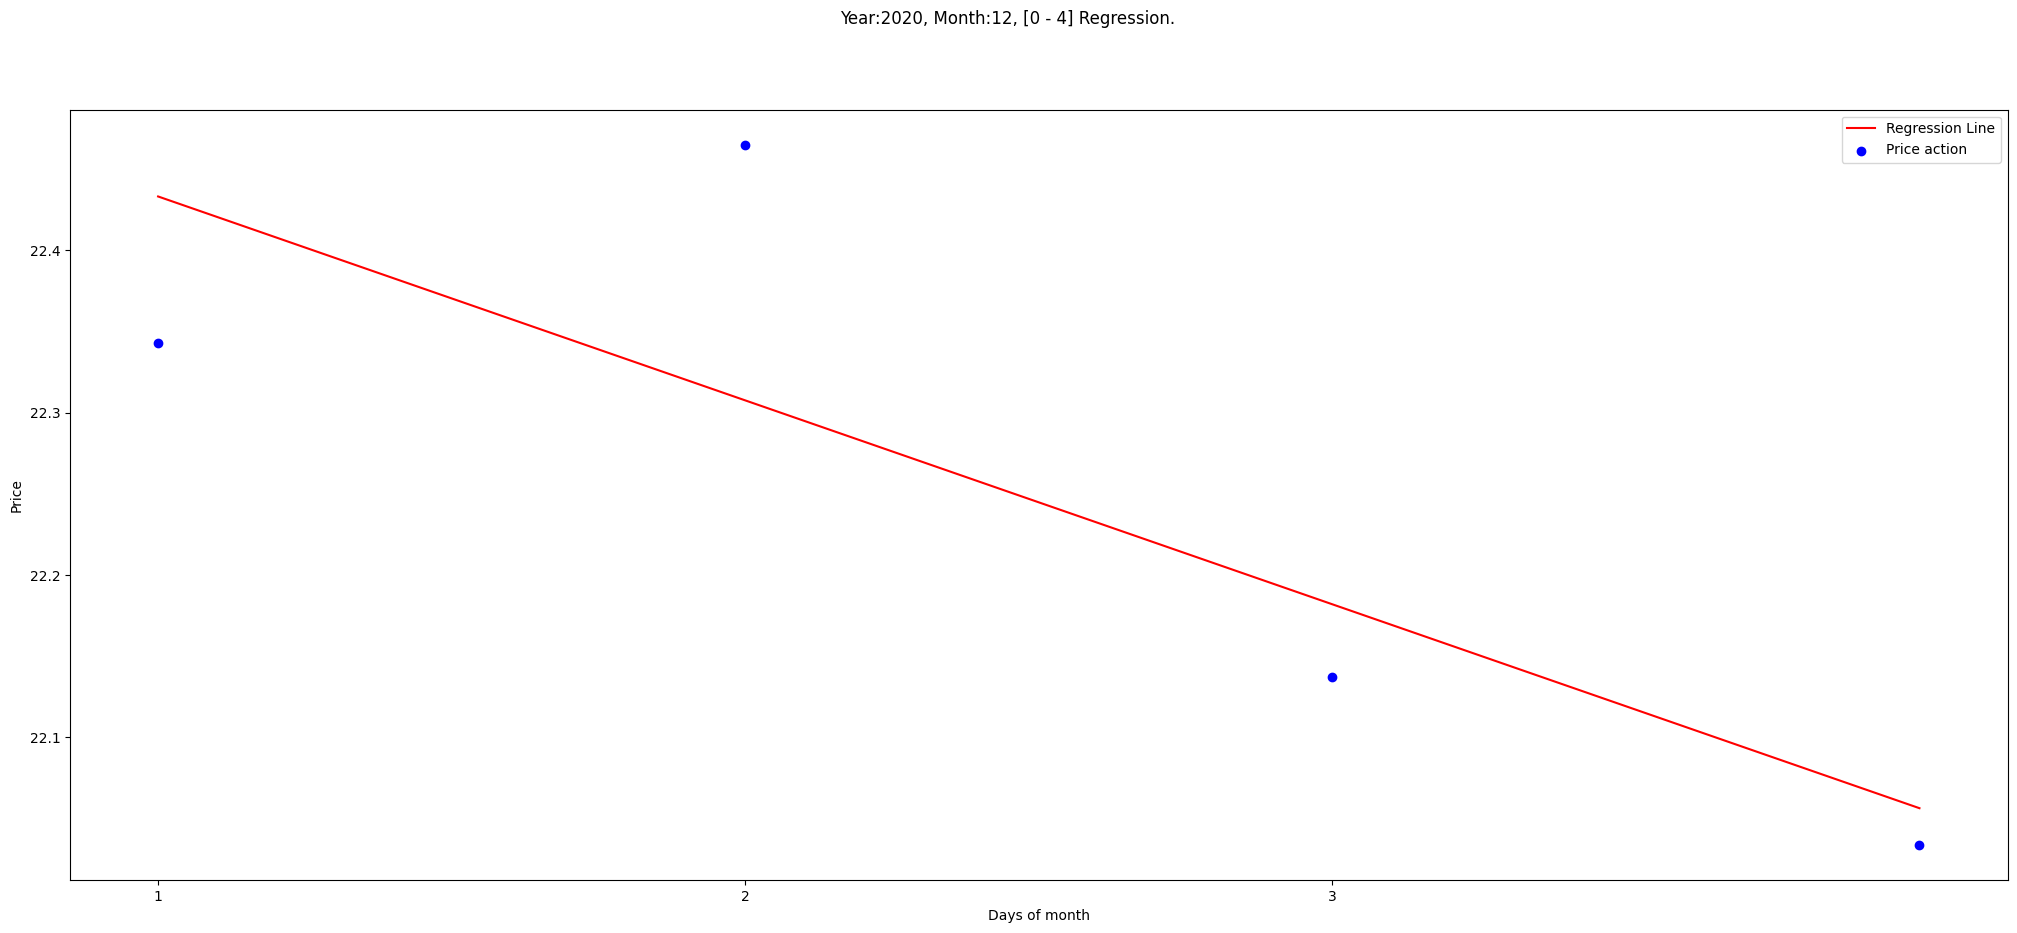

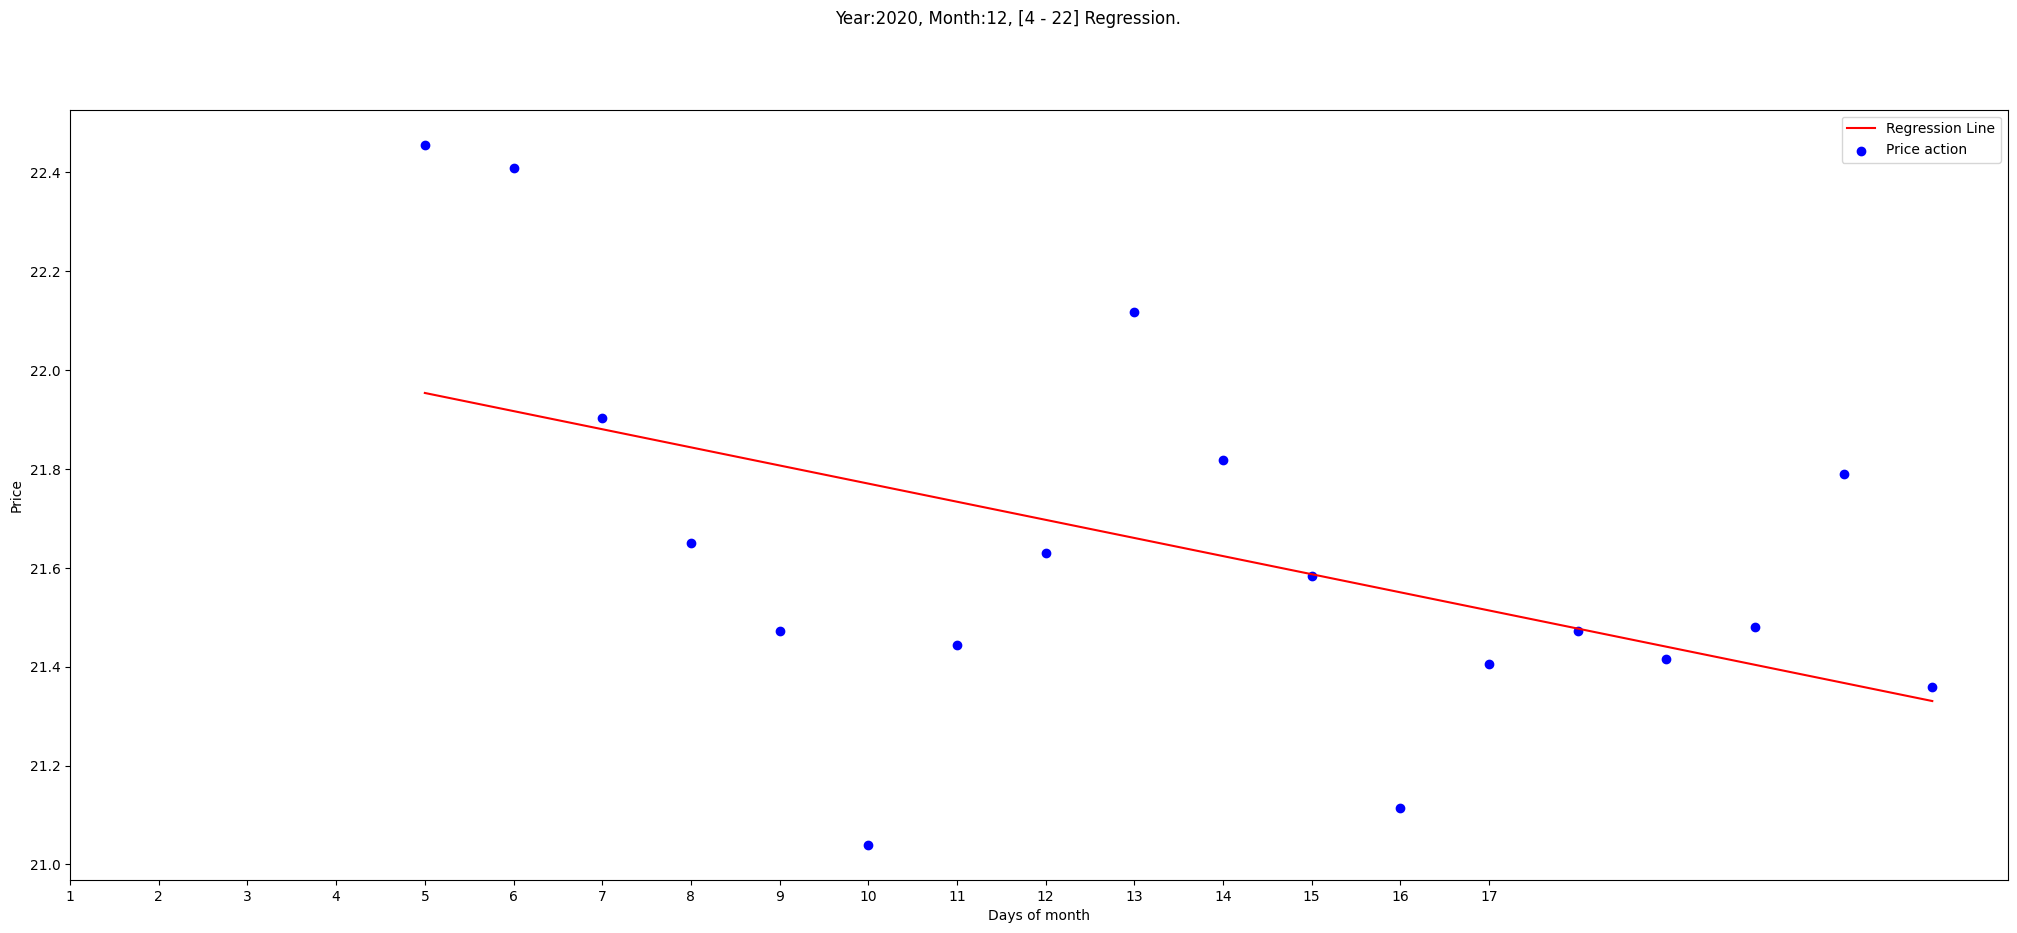

------------------------------------------------------------------------------------------------------------------------


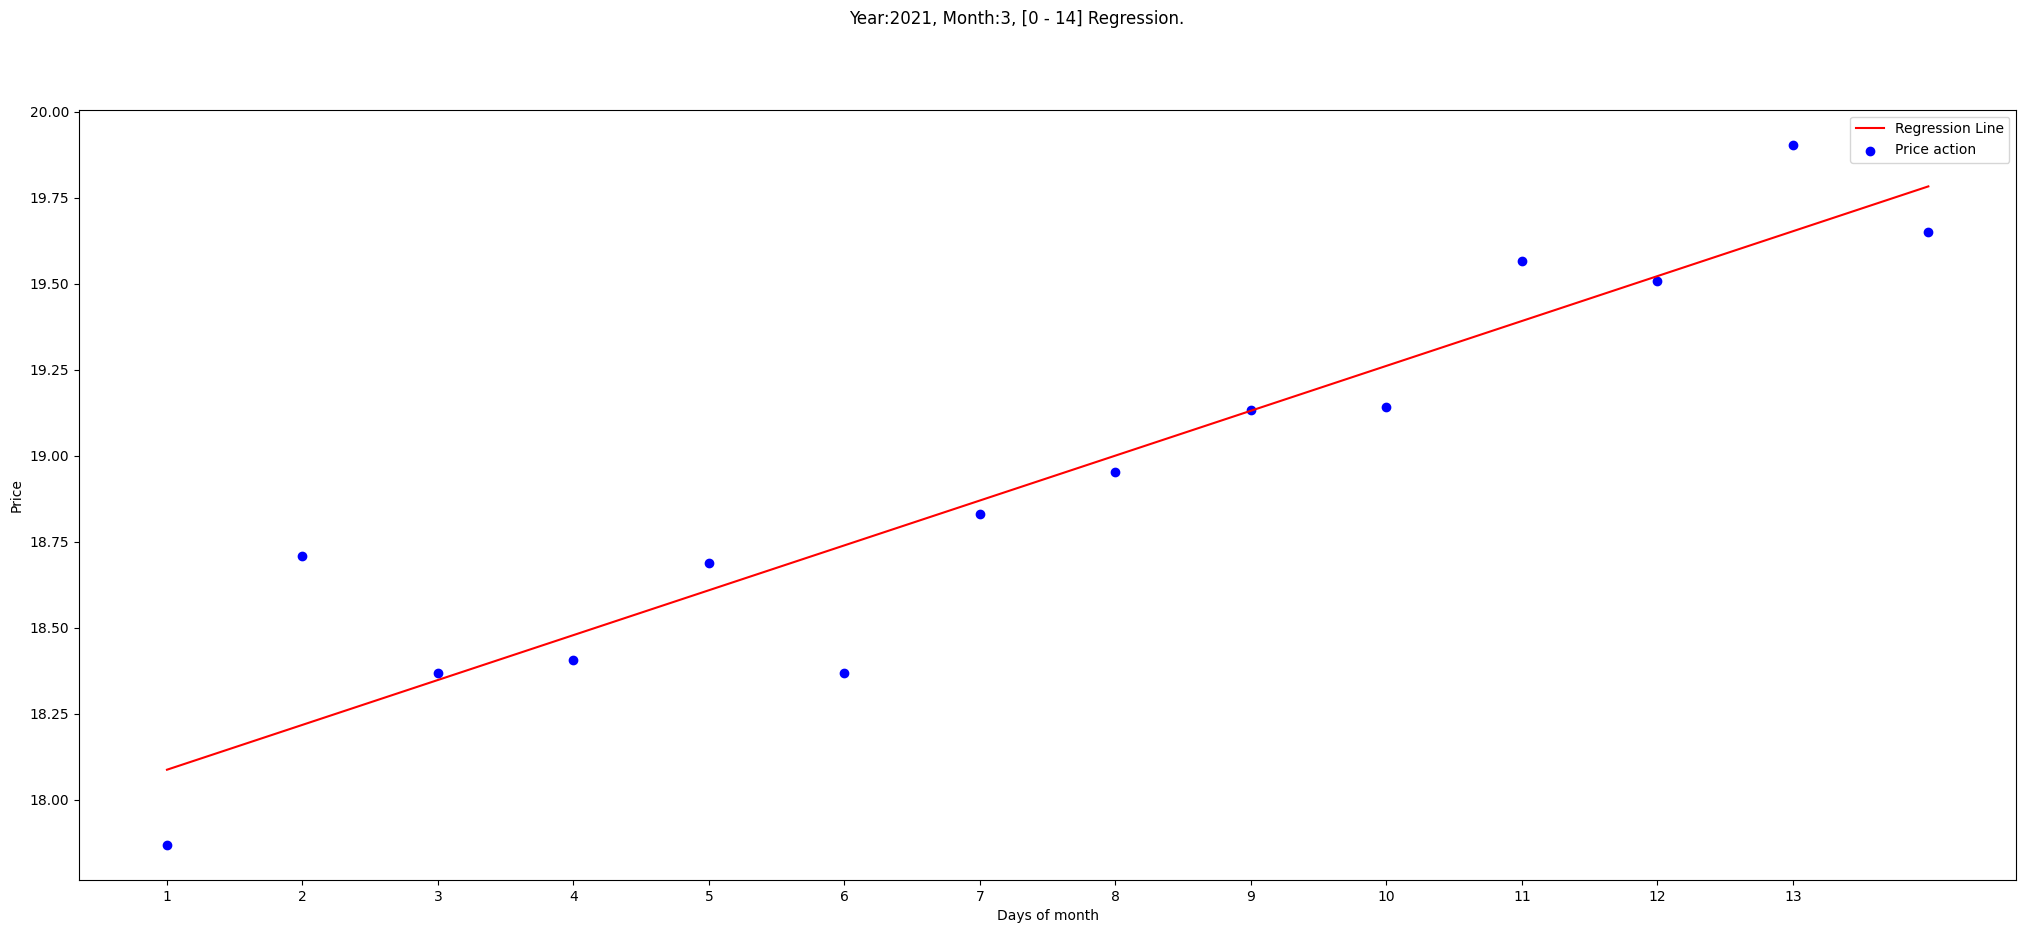

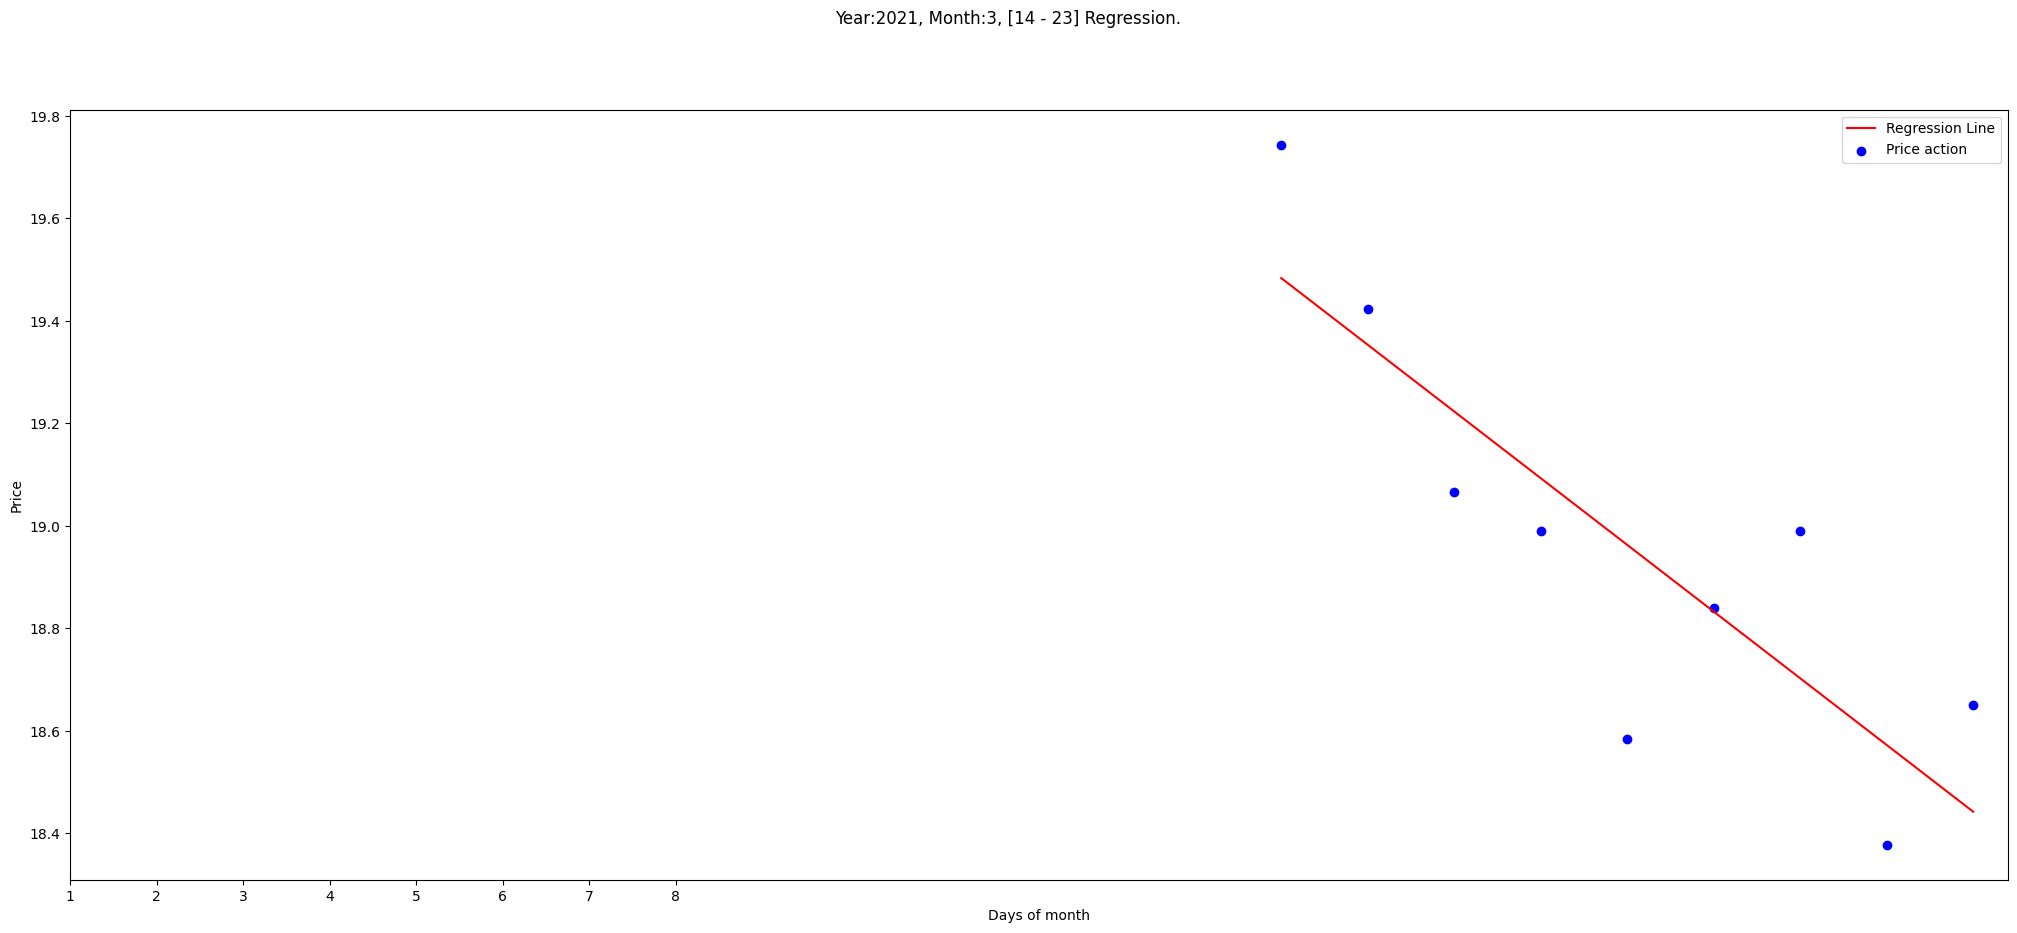

------------------------------------------------------------------------------------------------------------------------


In [9]:
ticker = "GOLD"
_dict = dict()
_list = list()

for year in [2020, 2021]:
    _dict[year] = dict()
    df = pd.read_csv(f"/content/sample_data/weekly_return_detailed.csv")
    df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")
    df["Month"] = df.apply(find_month, axis = 1)
    df = df.loc[df["Year"] == year]
    months = df['Month'].unique().tolist()
    for month in months:
        _dict[year][month] = dict()
        d_month = df.loc[df["Month"] == month].reset_index()
        d_month["index"] = d_month.index + 1

        sse_t = linear_regression(d_month, plot = False)
        _dict[year][month] = dict()
        _dict[year][month]["SSE"] = sse_t

        _dict[year][month]["SSE_sub"] = dict()
        least_i = None
        least_sum = None
        for i in range(2, len(d_month)-1):
            needed = [(6, 2020, 22),  (7, 2020, 20), (11, 2020, 19), (12, 2020, 4), (3, 2021, 14), (8, 2021, 22)]
            if (month, year, i) in needed:
                t1 = linear_regression(d_month[:i], plot = True, sub = f"0 - {i}")
                t2 = linear_regression(d_month[i:], plot = True, sub = f"{i} - {len(d_month)}")
                print("--"*60)

In [11]:
print(f_df.loc[f_df["Year"] == 2020])
print(f_df.loc[f_df["Year"] == 2021])

   Month  Year   k  F-Stats
0      2  2020   5   0.0758
2      8  2020  18   0.0975
3     10  2020   3   0.0923
   Month  Year  k  F-Stats
4      1  2021  3   0.0991
5      6  2021  3   0.0665
